In [1]:
# 한글 폰트 문제 해결을 위한 설정 코드
import matplotlib.font_manager as fm
import platform
import os

# 광고 클릭 예측 데이터 분석 - Part 1
# 타겟 분석 + 시간 패턴 + 사용자 세그먼트 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# # 한글 폰트 설정 (선택사항)
# plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Malgun Gothic']
# plt.rcParams['axes.unicode_minus'] = False

# 기본 스타일 설정
plt.style.use('default')
sns.set_palette("husl")

def setup_korean_font():
    """운영체제별 한글 폰트 설정"""
    
    print("🔍 현재 시스템:", platform.system())
    print("🔍 사용 가능한 폰트 확인 중...")
    
    # 운영체제별 한글 폰트 리스트
    korean_fonts = {
        'Windows': [
            'Malgun Gothic',
            'Microsoft YaHei', 
            'SimHei',
            'NanumGothic',
            'NanumBarunGothic'
        ],
        'Darwin': [  # macOS
            'AppleGothic',
            'Apple SD Gothic Neo',
            'NanumGothic',
            'NanumBarunGothic'
        ],
        'Linux': [
            'DejaVu Sans',
            'NanumGothic',
            'NanumBarunGothic',
            'UnDotum'
        ]
    }
    
    # 시스템에 설치된 폰트 목록
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    
    # 운영체제에 맞는 한글 폰트 찾기
    system = platform.system()
    fonts_to_try = korean_fonts.get(system, korean_fonts['Linux'])
    
    found_font = None
    for font in fonts_to_try:
        if font in available_fonts:
            found_font = font
            break
    
    if found_font:
        plt.rcParams['font.family'] = found_font
        plt.rcParams['axes.unicode_minus'] = False
        print(f"✅ 한글 폰트 설정 완료: {found_font}")
        return True
    else:
        print("❌ 적절한 한글 폰트를 찾을 수 없습니다.")
        print("📋 설치된 폰트 중 일부:")
        print([f for f in available_fonts if any(keyword in f.lower() for keyword in ['gothic', 'nanum', 'malgun'])][:10])
        return False

def test_korean_display():
    """한글 출력 테스트"""
    import matplotlib.pyplot as plt
    import numpy as np
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # 테스트 데이터
    x = ['월', '화', '수', '목', '금', '토', '일']
    y = np.random.rand(7)
    
    ax.bar(x, y)
    ax.set_title('한글 폰트 테스트')
    ax.set_xlabel('요일')
    ax.set_ylabel('값')
    
    plt.tight_layout()
    plt.show()
    
    print("위 차트에서 한글이 정상적으로 보이나요?")

setup_korean_font()
# # 폰트 설정 실행
# if setup_korean_font():
#     test_korean_display()
# else:
#     print("\n💡 해결 방법:")
#     print("1. 나눔고딕 폰트 설치: https://hangeul.naver.com/2017/nanum")
#     print("2. 영어 버전 코드 사용")
#     print("3. 폰트 캐시 초기화: matplotlib 폰트 캐시 삭제")

# # 폰트 캐시 초기화 함수 (필요시 사용)
# def clear_matplotlib_cache():
#     """matplotlib 폰트 캐시 초기화"""
#     try:
#         import matplotlib
#         cache_dir = matplotlib.get_cachedir()
#         print(f"캐시 디렉토리: {cache_dir}")
        
#         # 캐시 파일들 삭제
#         for file in os.listdir(cache_dir):
#             if file.endswith('.cache'):
#                 os.remove(os.path.join(cache_dir, file))
#                 print(f"삭제됨: {file}")
        
#         print("✅ 폰트 캐시 초기화 완료")
#         print("🔄 Python 재시작 후 다시 시도해주세요")
        
#     except Exception as e:
#         print(f"❌ 캐시 초기화 실패: {e}")

# # 필요시 캐시 초기화 실행
# # clear_matplotlib_cache()

🔍 현재 시스템: Windows
🔍 사용 가능한 폰트 확인 중...
✅ 한글 폰트 설정 완료: Malgun Gothic


True

In [2]:
print("🎯 광고 클릭 예측 데이터 분석 시작!")
print("=" * 60)

# ========================================
# 📊 1. 데이터 로드 및 기본 정보
# ========================================

# 데이터 로드
df = pd.read_csv('train_sample_2000000.csv')

print("📋 데이터 기본 정보:")
print(f"   총 샘플 수: {len(df):,}")
print(f"   총 컬럼 수: {len(df.columns)}")
print(f"   메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 결측값 확인
missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)
if len(missing_info) > 0:
    print(f"\n⚠️  결측값이 있는 컬럼: {len(missing_info)}개")
    print(missing_info.head(10))
else:
    print("\n✅ 결측값 없음")

print(f"\n📊 데이터 타입 분포:")
print(df.dtypes.value_counts())
print(df.info())
display(df.describe())

🎯 광고 클릭 예측 데이터 분석 시작!
📋 데이터 기본 정보:
   총 샘플 수: 2,000,000
   총 컬럼 수: 119
   메모리 사용량: 5674.60 MB

⚠️  결측값이 있는 컬럼: 96개
feat_e_3     202688
feat_a_8       3550
feat_a_15      3550
feat_a_17      3550
feat_a_1       3550
feat_a_2       3550
feat_a_3       3550
feat_a_4       3550
feat_a_5       3550
feat_a_6       3550
dtype: int64

📊 데이터 타입 분포:
float64    114
int64        4
object       1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Columns: 119 entries, gender to clicked
dtypes: float64(114), int64(4), object(1)
memory usage: 1.8+ GB
None


,gender,age_group,inventory_id,day_of_week,hour,l_feat_1,l_feat_2,l_feat_3,l_feat_4,l_feat_5,...,history_b_22,history_b_23,history_b_24,history_b_25,history_b_26,history_b_27,history_b_28,history_b_29,history_b_30,clicked
count,1.996722e+06,1.996722e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.996722e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,1.996722e+06,1.996722e+06,1.996722e+06,1.996722e+06,1.996722e+06,1.996722e+06,1.996722e+06,1.996722e+06,1.996722e+06,2.000000e+06
mean,1.372118e+00,6.400865e+00,3.162872e+01,4.000696e+00,1.268219e+01,1.858405e+00,1.831843e+00,2.357516e+00,9.547579e+00,3.936297e+02,...,4.413817e-01,4.393287e-01,7.321441e-02,2.926690e-02,2.776639e-01,3.166444e-01,9.880684e-02,2.538736e-01,2.174969e-01,1.915700e-02
std,4.833699e-01,1.564361e+00,2.249801e+01,1.999144e+00,6.349172e+00,3.486344e-01,3.740054e-01,7.161624e-01,5.950033e+00,2.899614e+02,...,1.979116e+00,1.977701e+00,3.296147e-01,1.318555e-01,1.232653e+00,1.408631e+00,4.397912e-01,1.142683e+00,7.617419e-01,1.370767e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,6.000000e+00,1.100000e+01,2.000000e+00,8.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,1.050000e+02,...,5.316300e-02,5.256900e-02,8.761500e-03,3.488400e-03,3.456880e-02,3.890560e-02,1.237600e-02,3.042520e-02,4.417710e-02,0.000000e+00
50%,1.000000e+00,7.000000e+00,3.600000e+01,4.000000e+00,1.200000e+01,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,3.750000e+02,...,9.365400e-02,9.259200e-02,1.543200e-02,6.141000e-03,6.113520e-02,6.888960e-02,2.169200e-02,5.349760e-02,7.857300e-02,0.000000e+00
75%,2.000000e+00,7.000000e+00,4.200000e+01,6.000000e+00,1.800000e+01,2.000000e+00,2.000000e+00,3.000000e+00,1.200000e+01,6.520000e+02,...,2.088180e-01,2.069010e-01,3.448350e-02,1.372980e-02,1.343958e-01,1.531072e-01,4.750600e-02,1.195428e-01,1.511004e-01,0.000000e+00
max,2.000000e+00,8.000000e+00,9.500000e+01,7.000000e+00,2.300000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.600000e+01,1.079000e+03,...,4.500000e+01,4.500000e+01,7.500000e+00,3.000000e+00,2.800000e+01,3.200000e+01,1.000000e+01,2.600000e+01,3.300000e+01,1.000000e+00



🎯 타겟 변수 (clicked) 분석
📈 전체 클릭률: 0.0192 (1.92%)
🔢 총 클릭 수: 38,314 / 2,000,000
⚖️  클래스 불균형 비율: 51.2:1 (Non-click:Click)


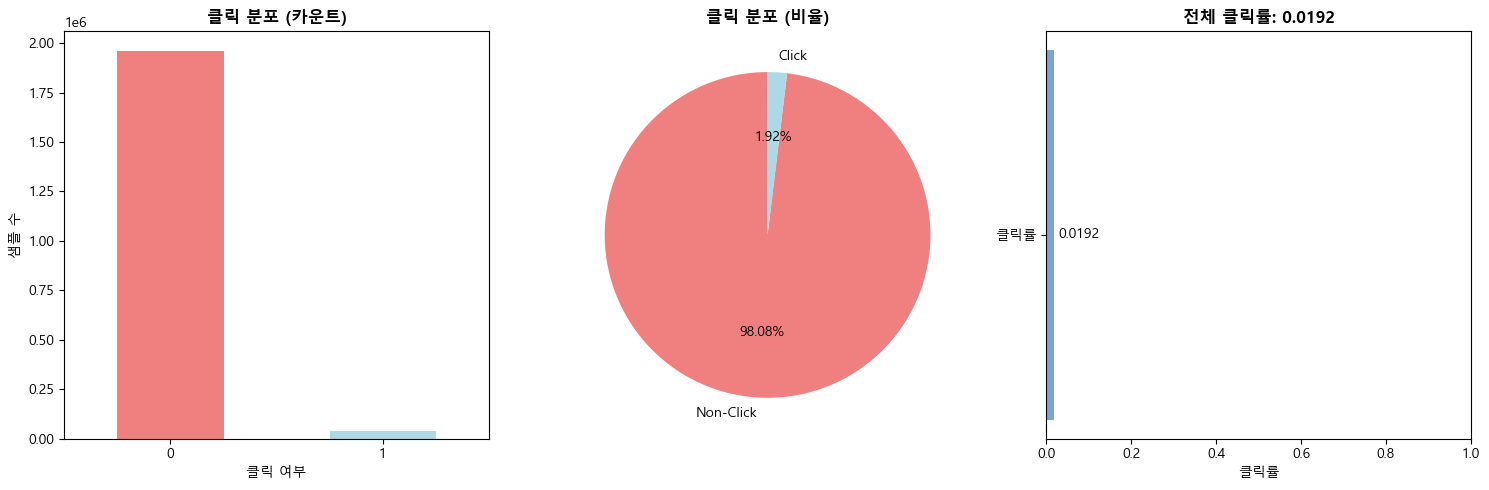

In [3]:

# ========================================
# 🎯 2. 타겟 변수 (clicked) 분석
# ========================================

print("\n" + "="*60)
print("🎯 타겟 변수 (clicked) 분석")
print("="*60)

# 클릭률 계산
click_rate = df['clicked'].mean()
total_clicks = df['clicked'].sum()
total_samples = len(df)

print(f"📈 전체 클릭률: {click_rate:.4f} ({click_rate*100:.2f}%)")
print(f"🔢 총 클릭 수: {total_clicks:,} / {total_samples:,}")
print(f"⚖️  클래스 불균형 비율: {(1-click_rate)/click_rate:.1f}:1 (Non-click:Click)")

# 타겟 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 클릭 분포 (카운트)
df['clicked'].value_counts().plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('클릭 분포 (카운트)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('클릭 여부')
axes[0].set_ylabel('샘플 수')
axes[0].tick_params(axis='x', rotation=0)

# 클릭 분포 (비율) - 파이차트
sizes = df['clicked'].value_counts()
labels = ['Non-Click', 'Click']
colors = ['lightcoral', 'lightblue']
axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
axes[1].set_title('클릭 분포 (비율)', fontsize=12, fontweight='bold')

# 클릭률 시각화 (게이지 형태)
axes[2].barh(['클릭률'], [click_rate], color='steelblue', alpha=0.7)
axes[2].set_xlim(0, 1)
axes[2].set_title(f'전체 클릭률: {click_rate:.4f}', fontsize=12, fontweight='bold')
axes[2].set_xlabel('클릭률')
for i, v in enumerate([click_rate]):
    axes[2].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()


⏰ 시간 패턴 분석
📊 시간대별 통계 (상위 5개):
      총_샘플수   클릭수     클릭률
hour                     
3     14737   343  0.0233
4     20678   471  0.0228
2     18421   405  0.0220
16    78739  1662  0.0211
15    77989  1638  0.0210

📊 요일별 통계:
    총_샘플수   클릭수     클릭률
월  284998  4868  0.0171
화  285963  6000  0.0210
수  285864  5643  0.0197
목  285716  5650  0.0198
금  286164  5568  0.0195
토  285873  5609  0.0196
일  285422  4976  0.0174


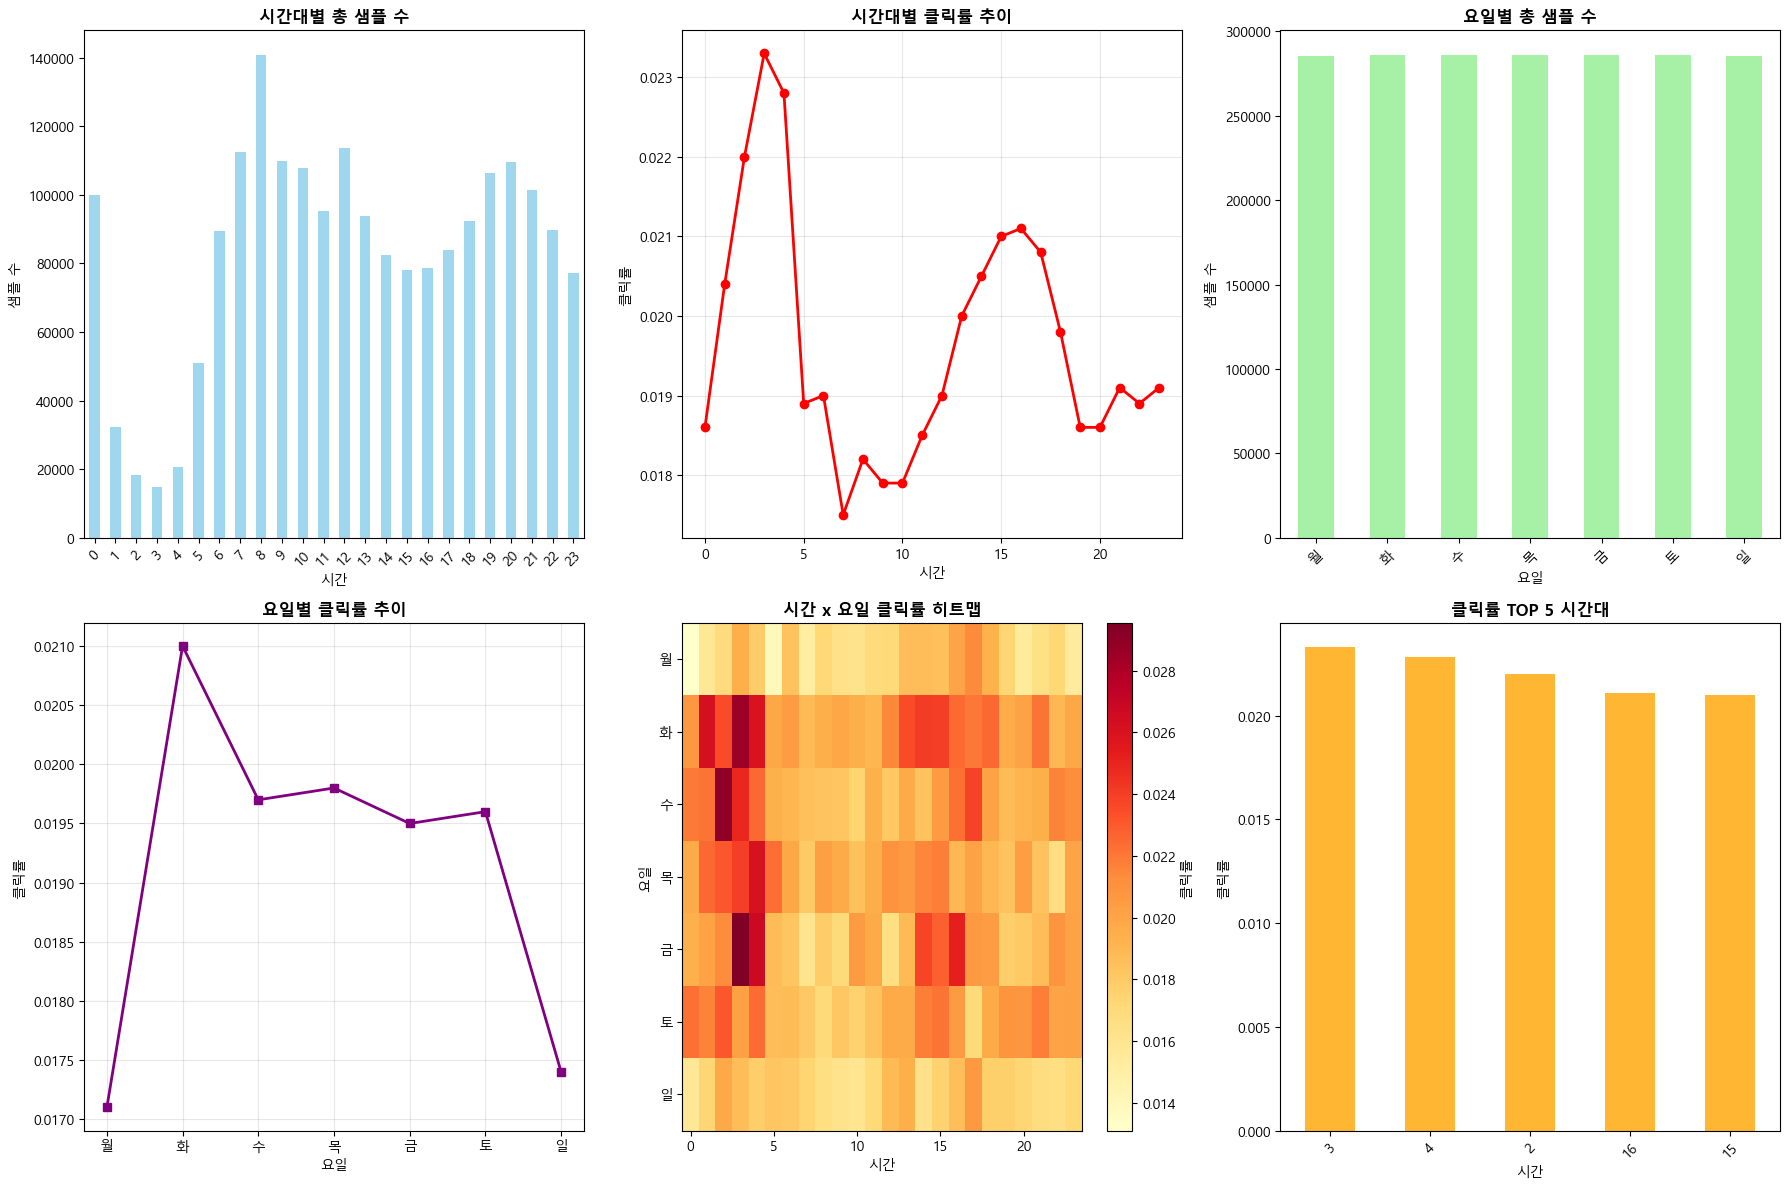


🕐 시간 패턴 인사이트:
   최고 클릭률 시간: 3시 (0.0233)
   최저 클릭률 시간: 7시 (0.0175)
   최고 클릭률 요일: 화 (0.0210)
   최저 클릭률 요일: 월 (0.0171)


In [4]:

# ========================================
# ⏰ 3. 시간 패턴 분석
# ========================================

print("\n" + "="*60)
print("⏰ 시간 패턴 분석")
print("="*60)

# 시간대별 활동 패턴
hourly_stats = df.groupby('hour').agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
hourly_stats.columns = ['총_샘플수', '클릭수', '클릭률']

print("📊 시간대별 통계 (상위 5개):")
print(hourly_stats.sort_values('클릭률', ascending=False).head())

# 요일별 활동 패턴
df['day_of_week'] -= 1
daily_stats = df.groupby('day_of_week').agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
daily_stats.columns = ['총_샘플수', '클릭수', '클릭률']

print(f"\n📊 요일별 통계:")
day_names = ['월', '화', '수', '목', '금', '토', '일']
daily_stats.index = [day_names[i] if i < len(day_names) else f'Day_{i}' for i in daily_stats.index]
print(daily_stats)

# 시간 패턴 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 시간대별 샘플 수
hourly_stats['총_샘플수'].plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('시간대별 총 샘플 수', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('시간')
axes[0,0].set_ylabel('샘플 수')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. 시간대별 클릭률
hourly_stats['클릭률'].plot(kind='line', ax=axes[0,1], color='red', marker='o', linewidth=2)
axes[0,1].set_title('시간대별 클릭률 추이', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('시간')
axes[0,1].set_ylabel('클릭률')
axes[0,1].grid(True, alpha=0.3)

# 3. 요일별 샘플 수
daily_stats['총_샘플수'].plot(kind='bar', ax=axes[0,2], color='lightgreen', alpha=0.8)
axes[0,2].set_title('요일별 총 샘플 수', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('요일')
axes[0,2].set_ylabel('샘플 수')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. 요일별 클릭률
daily_stats['클릭률'].plot(kind='line', ax=axes[1,0], color='purple', marker='s', linewidth=2)
axes[1,0].set_title('요일별 클릭률 추이', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('요일')
axes[1,0].set_ylabel('클릭률')
axes[1,0].grid(True, alpha=0.3)

# 5. 시간 x 요일 히트맵 (클릭률)
pivot_table = df.groupby(['day_of_week', 'hour'])['clicked'].mean().unstack()
im = axes[1,1].imshow(pivot_table.values, cmap='YlOrRd', aspect='auto')
axes[1,1].set_title('시간 x 요일 클릭률 히트맵', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('시간')
axes[1,1].set_ylabel('요일')
axes[1,1].set_yticks(range(len(pivot_table.index)))
axes[1,1].set_yticklabels([day_names[i] if i < len(day_names) else f'Day_{i}' for i in pivot_table.index])
plt.colorbar(im, ax=axes[1,1], label='클릭률')

# 6. 피크 시간대 분석
peak_hours = hourly_stats.nlargest(5, '클릭률')
peak_hours.index.name = '시간'
peak_hours['클릭률'].plot(kind='bar', ax=axes[1,2], color='orange', alpha=0.8)
axes[1,2].set_title('클릭률 TOP 5 시간대', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('시간')
axes[1,2].set_ylabel('클릭률')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 시간 인사이트 출력
print(f"\n🕐 시간 패턴 인사이트:")
peak_hour = hourly_stats['클릭률'].idxmax()
low_hour = hourly_stats['클릭률'].idxmin()
print(f"   최고 클릭률 시간: {peak_hour}시 ({hourly_stats.loc[peak_hour, '클릭률']:.4f})")
print(f"   최저 클릭률 시간: {low_hour}시 ({hourly_stats.loc[low_hour, '클릭률']:.4f})")

peak_day = daily_stats['클릭률'].idxmax()
low_day = daily_stats['클릭률'].idxmin()
print(f"   최고 클릭률 요일: {peak_day} ({daily_stats.loc[peak_day, '클릭률']:.4f})")
print(f"   최저 클릭률 요일: {low_day} ({daily_stats.loc[low_day, '클릭률']:.4f})")



👥 사용자 세그먼트 분석
📊 성별 통계:
          총_샘플수    클릭수     클릭률
gender                        
1.0     1253705  24484  0.0195
2.0      743017  13764  0.0185

📊 연령그룹 통계:
            총_샘플수    클릭수     클릭률
age_group                       
1.0          5375    384  0.0714
8.0        494892  11224  0.0227
2.0         66944   1501  0.0224
3.0         89496   1799  0.0201
4.0        103501   1966  0.0190
5.0        110997   1955  0.0176
7.0        691770  12127  0.0175
6.0        433747   7292  0.0168

📊 성별 x 연령그룹 교차 분석 (클릭률 상위 10개):
                   총_샘플수   클릭수     클릭률
gender age_group                      
1.0    1.0          3274   247  0.0754
2.0    1.0          2101   137  0.0652
       2.0         28213   719  0.0255
1.0    8.0        333697  7673  0.0230
2.0    3.0         38847   870  0.0224
       8.0        161195  3551  0.0220
1.0    2.0         38731   782  0.0202
2.0    4.0         43246   872  0.0202
1.0    3.0         50649   929  0.0183
       4.0         60255  1094  0.0182


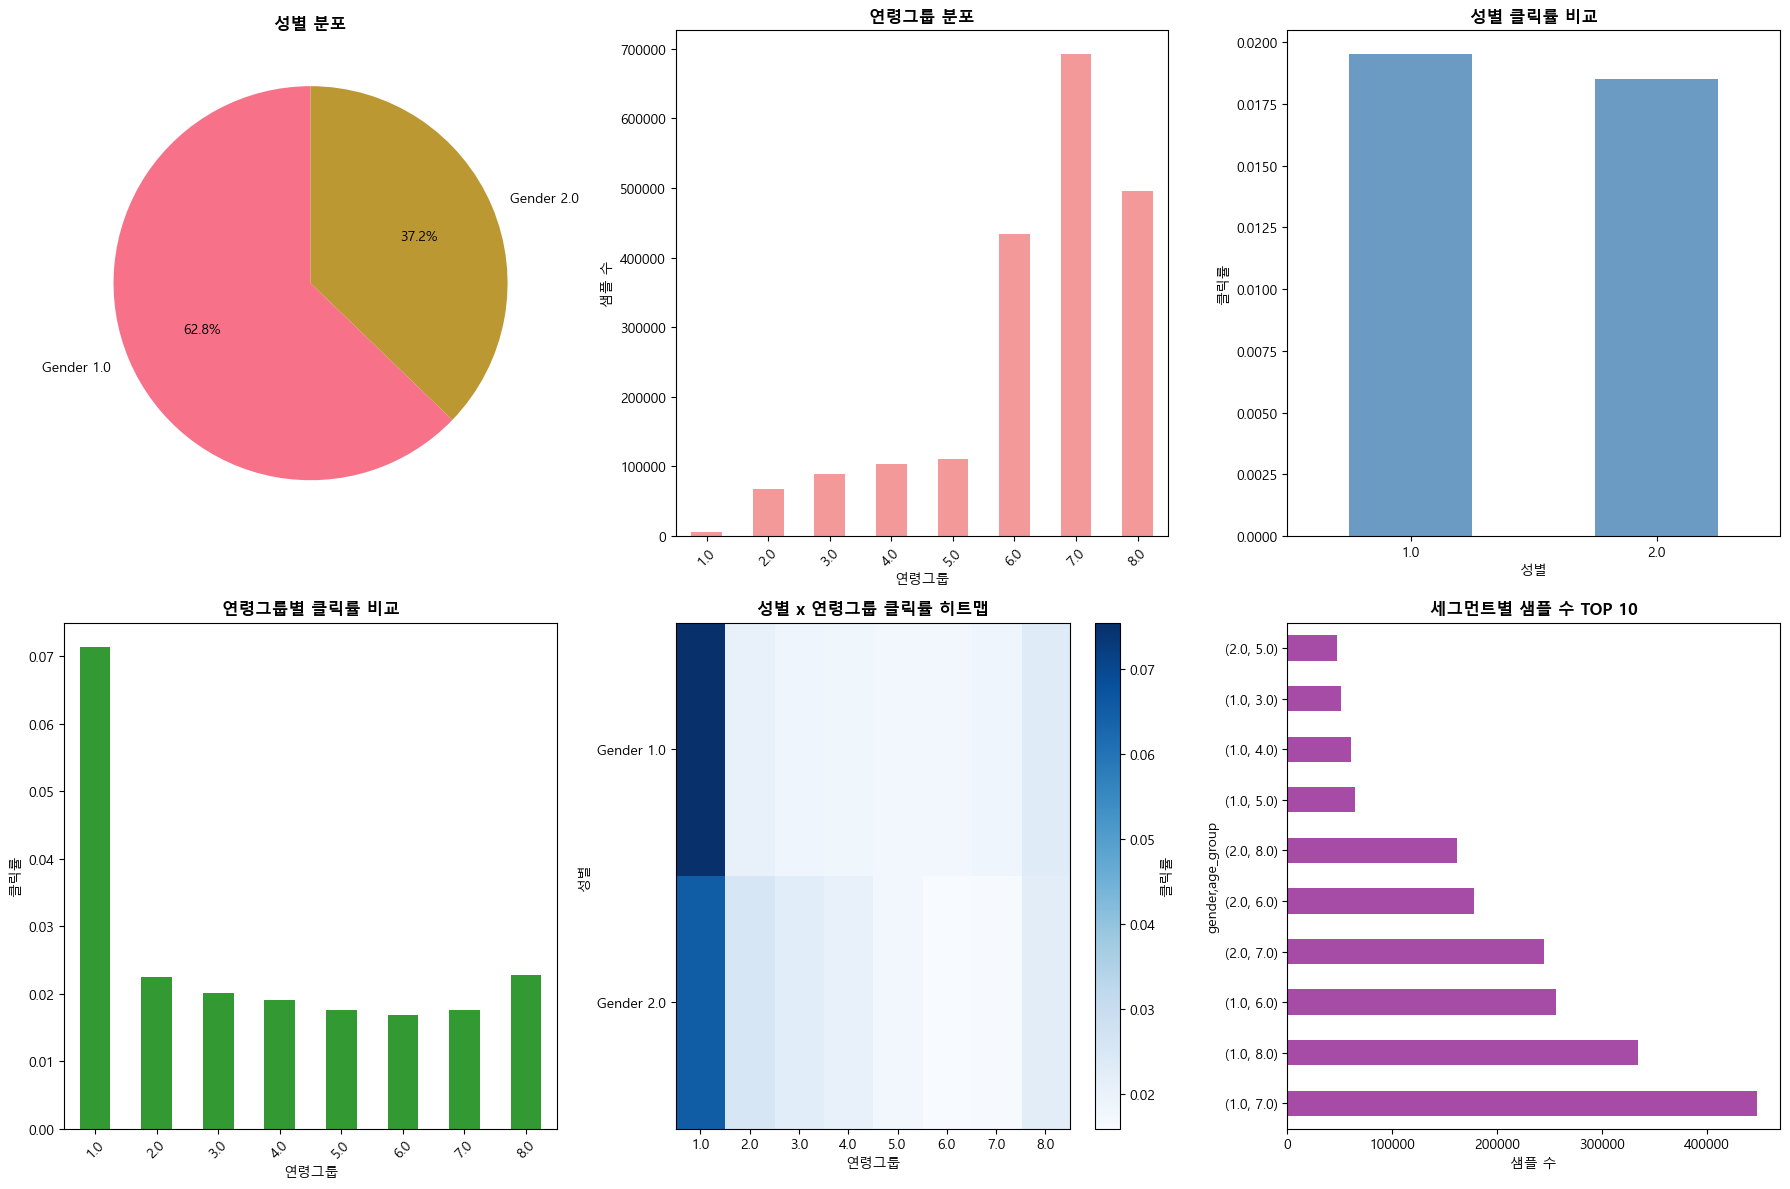


👥 세그먼트 인사이트:
   최고 클릭률 성별: Gender 1.0 (0.0195)
   최고 클릭률 연령: Age 1.0 (0.0714)
   최고 클릭률 세그먼트: Gender 1.0, Age 1.0 (0.0754)


In [5]:

# ========================================
# 👥 4. 사용자 세그먼트 분석
# ========================================

print("\n" + "="*60)
print("👥 사용자 세그먼트 분석")
print("="*60)

# 성별 분석
gender_stats = df.groupby('gender').agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
gender_stats.columns = ['총_샘플수', '클릭수', '클릭률']

print("📊 성별 통계:")
print(gender_stats)

# 연령그룹 분석
age_stats = df.groupby('age_group').agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
age_stats.columns = ['총_샘플수', '클릭수', '클릭률']

print(f"\n📊 연령그룹 통계:")
print(age_stats.sort_values('클릭률', ascending=False))

# 성별 x 연령그룹 교차 분석
cross_analysis = df.groupby(['gender', 'age_group']).agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
cross_analysis.columns = ['총_샘플수', '클릭수', '클릭률']

print(f"\n📊 성별 x 연령그룹 교차 분석 (클릭률 상위 10개):")
print(cross_analysis.sort_values('클릭률', ascending=False).head(10))

# 사용자 세그먼트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 성별 분포
gender_counts = df['gender'].value_counts()
axes[0,0].pie(gender_counts.values, labels=[f'Gender {i}' for i in gender_counts.index], 
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('성별 분포', fontsize=12, fontweight='bold')

# 2. 연령그룹 분포
age_counts = df['age_group'].value_counts().sort_index()
age_counts.plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('연령그룹 분포', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('연령그룹')
axes[0,1].set_ylabel('샘플 수')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. 성별 클릭률 비교
gender_stats['클릭률'].plot(kind='bar', ax=axes[0,2], color='steelblue', alpha=0.8)
axes[0,2].set_title('성별 클릭률 비교', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('성별')
axes[0,2].set_ylabel('클릭률')
axes[0,2].tick_params(axis='x', rotation=0)

# 4. 연령그룹 클릭률 비교
age_stats['클릭률'].plot(kind='bar', ax=axes[1,0], color='green', alpha=0.8)
axes[1,0].set_title('연령그룹별 클릭률 비교', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('연령그룹')
axes[1,0].set_ylabel('클릭률')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. 성별 x 연령그룹 히트맵 (클릭률)
pivot_cross = df.groupby(['gender', 'age_group'])['clicked'].mean().unstack(fill_value=0)
im2 = axes[1,1].imshow(pivot_cross.values, cmap='Blues', aspect='auto')
axes[1,1].set_title('성별 x 연령그룹 클릭률 히트맵', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('연령그룹')
axes[1,1].set_ylabel('성별')
axes[1,1].set_yticks(range(len(pivot_cross.index)))
axes[1,1].set_yticklabels([f'Gender {i}' for i in pivot_cross.index])
axes[1,1].set_xticks(range(len(pivot_cross.columns)))
axes[1,1].set_xticklabels(pivot_cross.columns)
plt.colorbar(im2, ax=axes[1,1], label='클릭률')

# 6. 세그먼트별 샘플 수 비교
cross_samples = df.groupby(['gender', 'age_group']).size().sort_values(ascending=False).head(10)
cross_samples.plot(kind='barh', ax=axes[1,2], color='purple', alpha=0.7)
axes[1,2].set_title('세그먼트별 샘플 수 TOP 10', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('샘플 수')

plt.tight_layout()
plt.show()

# 세그먼트 인사이트 출력
print(f"\n👥 세그먼트 인사이트:")
best_gender = gender_stats['클릭률'].idxmax()
best_age = age_stats['클릭률'].idxmax()
best_segment = cross_analysis['클릭률'].idxmax()

print(f"   최고 클릭률 성별: Gender {best_gender} ({gender_stats.loc[best_gender, '클릭률']:.4f})")
print(f"   최고 클릭률 연령: Age {best_age} ({age_stats.loc[best_age, '클릭률']:.4f})")
print(f"   최고 클릭률 세그먼트: Gender {best_segment[0]}, Age {best_segment[1]} ({cross_analysis.loc[best_segment, '클릭률']:.4f})")


🔍 Part 2: 시퀀스 분석 + 피처 상관관계 분석
📊 로드된 데이터: 2,000,000 샘플

🔗 시퀀스 데이터 (seq) 분석
📏 시퀀스 길이 통계:
count    2.000000e+06
mean     5.302058e+02
std      4.348858e+02
min      1.000000e+00
25%      1.810000e+02
50%      4.390000e+02
75%      7.780000e+02
max      1.056000e+04
Name: seq_length, dtype: float64

📊 시퀀스 길이별 클릭률 (상위 10개):
            샘플수  클릭수  클릭률
seq_length               
2906          1    1  1.0
3197          1    1  1.0
5186          2    1  0.5
2687          2    1  0.5
2850          2    1  0.5
5333          2    1  0.5
2914          2    1  0.5
3440          2    1  0.5
3533          2    1  0.5
2899          2    1  0.5

📊 시퀀스 길이 구간별 분석:
                   샘플수   클릭수     클릭률
seq_length_bin                      
매우짧음(<100)      309280  9348  0.0302
짧음(100-300)     437298  8565  0.0196
보통(300-600)     515260  8859  0.0172
김(600-1000)     453700  7130  0.0157
매우김(1000+)      284462  4412  0.0155

🌈 시퀀스 다양성 분석:
   평균 고유 아이템 수: 52.67
   평균 다양성 비율: 0.1793

📊 다양성 비율별 클릭률:
                

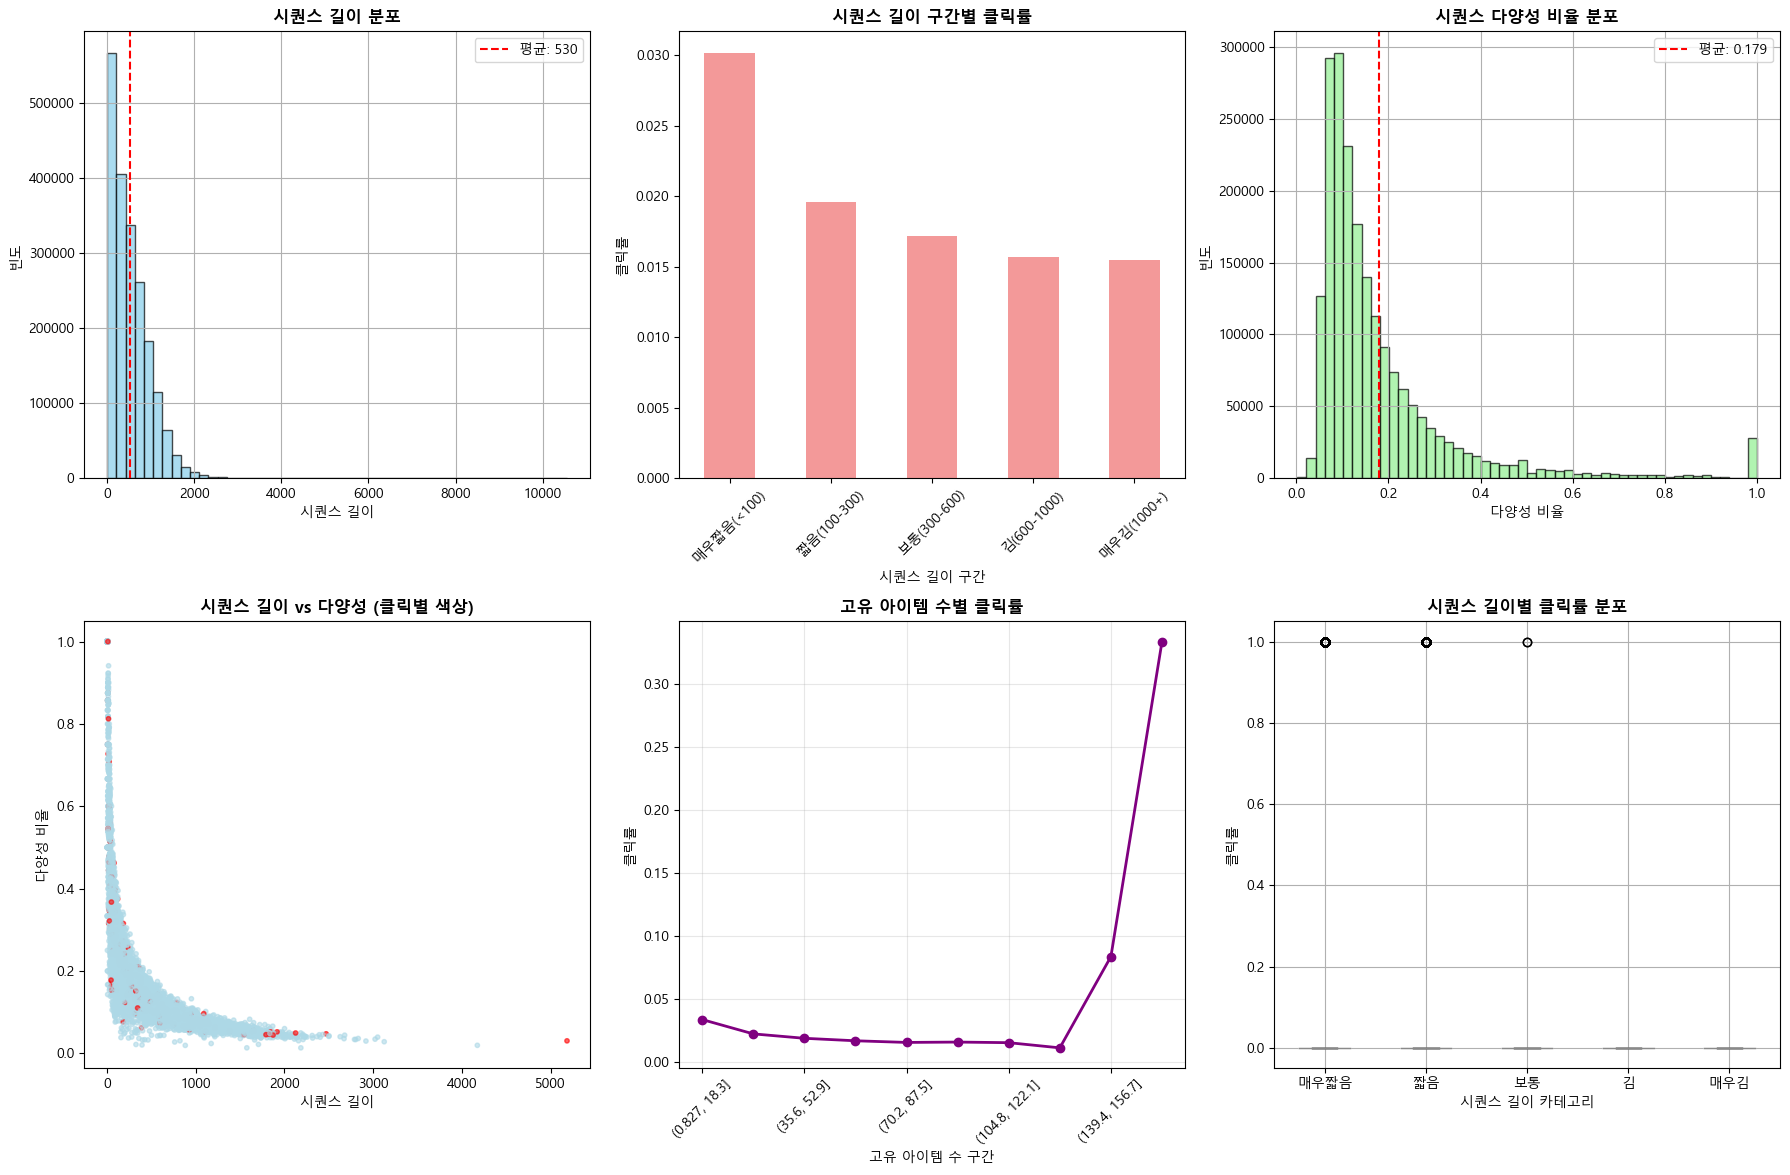

In [2]:
# 광고 클릭 예측 데이터 분석 - Part 2
# 시퀀스 분석 + 피처 상관관계 분석

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, pearsonr
import warnings
warnings.filterwarnings('ignore')

# # 한글 폰트 설정
# plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Malgun Gothic']
# plt.rcParams['axes.unicode_minus'] = False
# plt.style.use('default')
# sns.set_palette("husl")

print("🔍 Part 2: 시퀀스 분석 + 피처 상관관계 분석")
print("=" * 60)

# 데이터 로드
df = pd.read_csv('train_sample_2000000.csv')
print(f"📊 로드된 데이터: {len(df):,} 샘플")

# ========================================
# 🔗 1. 시퀀스 데이터 (seq) 분석
# ========================================

print("\n" + "="*60)
print("🔗 시퀀스 데이터 (seq) 분석")
print("="*60)

# 시퀀스 길이 분석
df['seq_length'] = df['seq'].str.split(',').str.len()
df['seq_items'] = df['seq'].str.split(',')

print("📏 시퀀스 길이 통계:")
seq_stats = df['seq_length'].describe()
print(seq_stats)

# 시퀀스 길이별 클릭률 분석
seq_length_analysis = df.groupby('seq_length').agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
seq_length_analysis.columns = ['샘플수', '클릭수', '클릭률']

print(f"\n📊 시퀀스 길이별 클릭률 (상위 10개):")
print(seq_length_analysis.sort_values('클릭률', ascending=False).head(10))

# 시퀀스 길이 구간별 분석
df['seq_length_bin'] = pd.cut(df['seq_length'], 
                             bins=[0, 100, 300, 600, 1000, float('inf')], 
                             labels=['매우짧음(<100)', '짧음(100-300)', '보통(300-600)', '김(600-1000)', '매우김(1000+)'])

seq_bin_analysis = df.groupby('seq_length_bin').agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
seq_bin_analysis.columns = ['샘플수', '클릭수', '클릭률']

print(f"\n📊 시퀀스 길이 구간별 분석:")
print(seq_bin_analysis)

# 시퀀스 내 고유 아이템 수 분석
def count_unique_items(seq_str):
    try:
        items = seq_str.split(',')
        return len(set(items))
    except:
        return 0

df['unique_items'] = df['seq'].apply(count_unique_items)
df['diversity_ratio'] = df['unique_items'] / df['seq_length']

print(f"\n🌈 시퀀스 다양성 분석:")
print(f"   평균 고유 아이템 수: {df['unique_items'].mean():.2f}")
print(f"   평균 다양성 비율: {df['diversity_ratio'].mean():.4f}")

diversity_analysis = df.groupby(pd.cut(df['diversity_ratio'], bins=5)).agg({
    'clicked': ['count', 'mean']
}).round(4)
diversity_analysis.columns = ['샘플수', '클릭률']
print(f"\n📊 다양성 비율별 클릭률:")
print(diversity_analysis)

# 시퀀스 분석 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 시퀀스 길이 분포
df['seq_length'].hist(bins=50, ax=axes[0,0], color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('시퀀스 길이 분포', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('시퀀스 길이')
axes[0,0].set_ylabel('빈도')
axes[0,0].axvline(df['seq_length'].mean(), color='red', linestyle='--', label=f'평균: {df["seq_length"].mean():.0f}')
axes[0,0].legend()

# 2. 시퀀스 길이 vs 클릭률 (구간별)
seq_bin_analysis['클릭률'].plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('시퀀스 길이 구간별 클릭률', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('시퀀스 길이 구간')
axes[0,1].set_ylabel('클릭률')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. 다양성 비율 분포
df['diversity_ratio'].hist(bins=50, ax=axes[0,2], color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,2].set_title('시퀀스 다양성 비율 분포', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('다양성 비율')
axes[0,2].set_ylabel('빈도')
axes[0,2].axvline(df['diversity_ratio'].mean(), color='red', linestyle='--', label=f'평균: {df["diversity_ratio"].mean():.3f}')
axes[0,2].legend()

# 4. 시퀀스 길이 vs 클릭률 산점도
sample_df = df.sample(n=min(10000, len(df)))  # 샘플링으로 시각화 최적화
clicked_color = sample_df['clicked'].map({0: 'lightblue', 1: 'red'})
axes[1,0].scatter(sample_df['seq_length'], sample_df['diversity_ratio'], 
                  c=clicked_color, alpha=0.6, s=10)
axes[1,0].set_title('시퀀스 길이 vs 다양성 (클릭별 색상)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('시퀀스 길이')
axes[1,0].set_ylabel('다양성 비율')

# 5. 고유 아이템 수 vs 클릭률
unique_bins = pd.cut(df['unique_items'], bins=10)
unique_analysis = df.groupby(unique_bins)['clicked'].mean()
unique_analysis.plot(kind='line', ax=axes[1,1], marker='o', color='purple', linewidth=2)
axes[1,1].set_title('고유 아이템 수별 클릭률', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('고유 아이템 수 구간')
axes[1,1].set_ylabel('클릭률')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# 6. 시퀀스 길이와 클릭률의 관계 (박스플롯)
df['seq_length_category'] = pd.cut(df['seq_length'], bins=5, labels=['매우짧음', '짧음', '보통', '김', '매우김'])
df.boxplot(column='clicked', by='seq_length_category', ax=axes[1,2])
axes[1,2].set_title('시퀀스 길이별 클릭률 분포', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('시퀀스 길이 카테고리')
axes[1,2].set_ylabel('클릭률')

plt.suptitle('', fontsize=16)  # 기본 제목 제거
plt.tight_layout()
plt.show()



📊 피처 그룹별 분석
🔍 피처 그룹별 구성:
   l_feat: 27개 피처, 결측값: 29,502개
   feat_a: 18개 피처, 결측값: 63,900개
   feat_b: 6개 피처, 결측값: 19,668개
   feat_c: 8개 피처, 결측값: 26,224개
   feat_d: 6개 피처, 결측값: 19,668개
   feat_e: 10개 피처, 결측값: 232,190개
   history_a: 7개 피처, 결측값: 22,946개
   history_b: 30개 피처, 결측값: 98,340개


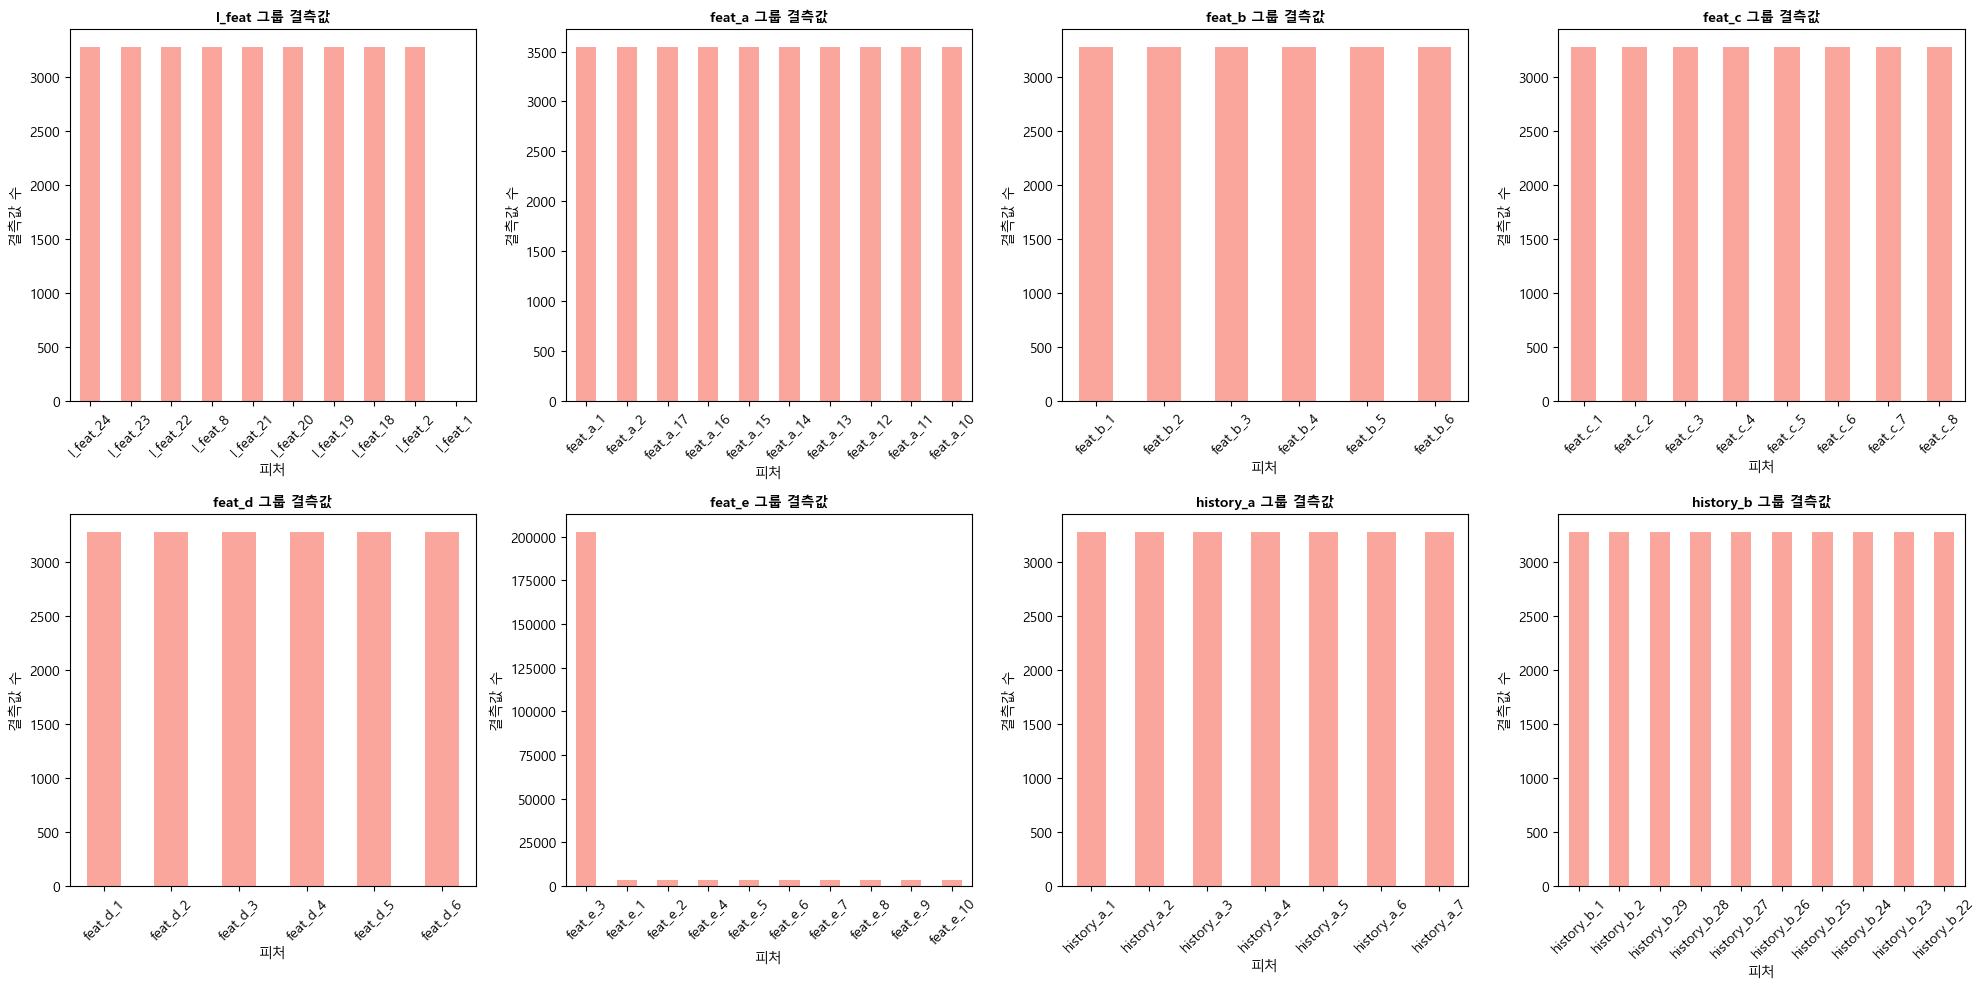

In [3]:

# ========================================
# 📊 2. 피처 그룹별 분석
# ========================================

print("\n" + "="*60)
print("📊 피처 그룹별 분석")
print("="*60)

# 피처 그룹 정의
feature_groups = {
    'l_feat': [col for col in df.columns if col.startswith('l_feat_')],
    'feat_a': [col for col in df.columns if col.startswith('feat_a_')],
    'feat_b': [col for col in df.columns if col.startswith('feat_b_')],
    'feat_c': [col for col in df.columns if col.startswith('feat_c_')],
    'feat_d': [col for col in df.columns if col.startswith('feat_d_')],
    'feat_e': [col for col in df.columns if col.startswith('feat_e_')],
    'history_a': [col for col in df.columns if col.startswith('history_a_')],
    'history_b': [col for col in df.columns if col.startswith('history_b_')]
}

print("🔍 피처 그룹별 구성:")
for group, features in feature_groups.items():
    missing_count = df[features].isnull().sum().sum()
    print(f"   {group}: {len(features)}개 피처, 결측값: {missing_count:,}개")

# 피처 그룹별 결측값 패턴 분석
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, (group, features) in enumerate(feature_groups.items()):
    if i < len(axes):
        missing_pattern = df[features].isnull().sum().sort_values(ascending=False)
        if len(missing_pattern) > 0:
            missing_pattern.head(10).plot(kind='bar', ax=axes[i], color='salmon', alpha=0.7)
            axes[i].set_title(f'{group} 그룹 결측값', fontsize=10, fontweight='bold')
            axes[i].set_xlabel('피처')
            axes[i].set_ylabel('결측값 수')
            axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



🔗 타겟과 피처간 상관관계 분석
📊 타겟과 상관관계 TOP 20:
    1. history_a_1         :   0.0707 (절댓값: 0.0707)
    2. history_a_2         :  -0.0603 (절댓값: 0.0603)
    3. history_b_2         :   0.0600 (절댓값: 0.0600)
    4. history_a_3         :   0.0589 (절댓값: 0.0589)
    5. history_b_30        :   0.0588 (절댓값: 0.0588)
    6. history_a_5         :  -0.0586 (절댓값: 0.0586)
    7. history_b_1         :   0.0541 (절댓값: 0.0541)
    8. inventory_id        :   0.0529 (절댓값: 0.0529)
    9. feat_b_4            :  -0.0501 (절댓값: 0.0501)
   10. history_b_10        :   0.0496 (절댓값: 0.0496)
   11. feat_d_3            :  -0.0484 (절댓값: 0.0484)
   12. feat_e_1            :  -0.0476 (절댓값: 0.0476)
   13. history_b_17        :   0.0452 (절댓값: 0.0452)
   14. history_b_15        :   0.0441 (절댓값: 0.0441)
   15. history_b_9         :   0.0441 (절댓값: 0.0441)
   16. history_b_3         :   0.0439 (절댓값: 0.0439)
   17. history_b_20        :   0.0438 (절댓값: 0.0438)
   18. history_b_27        :   0.0434 (절댓값: 0.0434)
   19. feat_d_2           

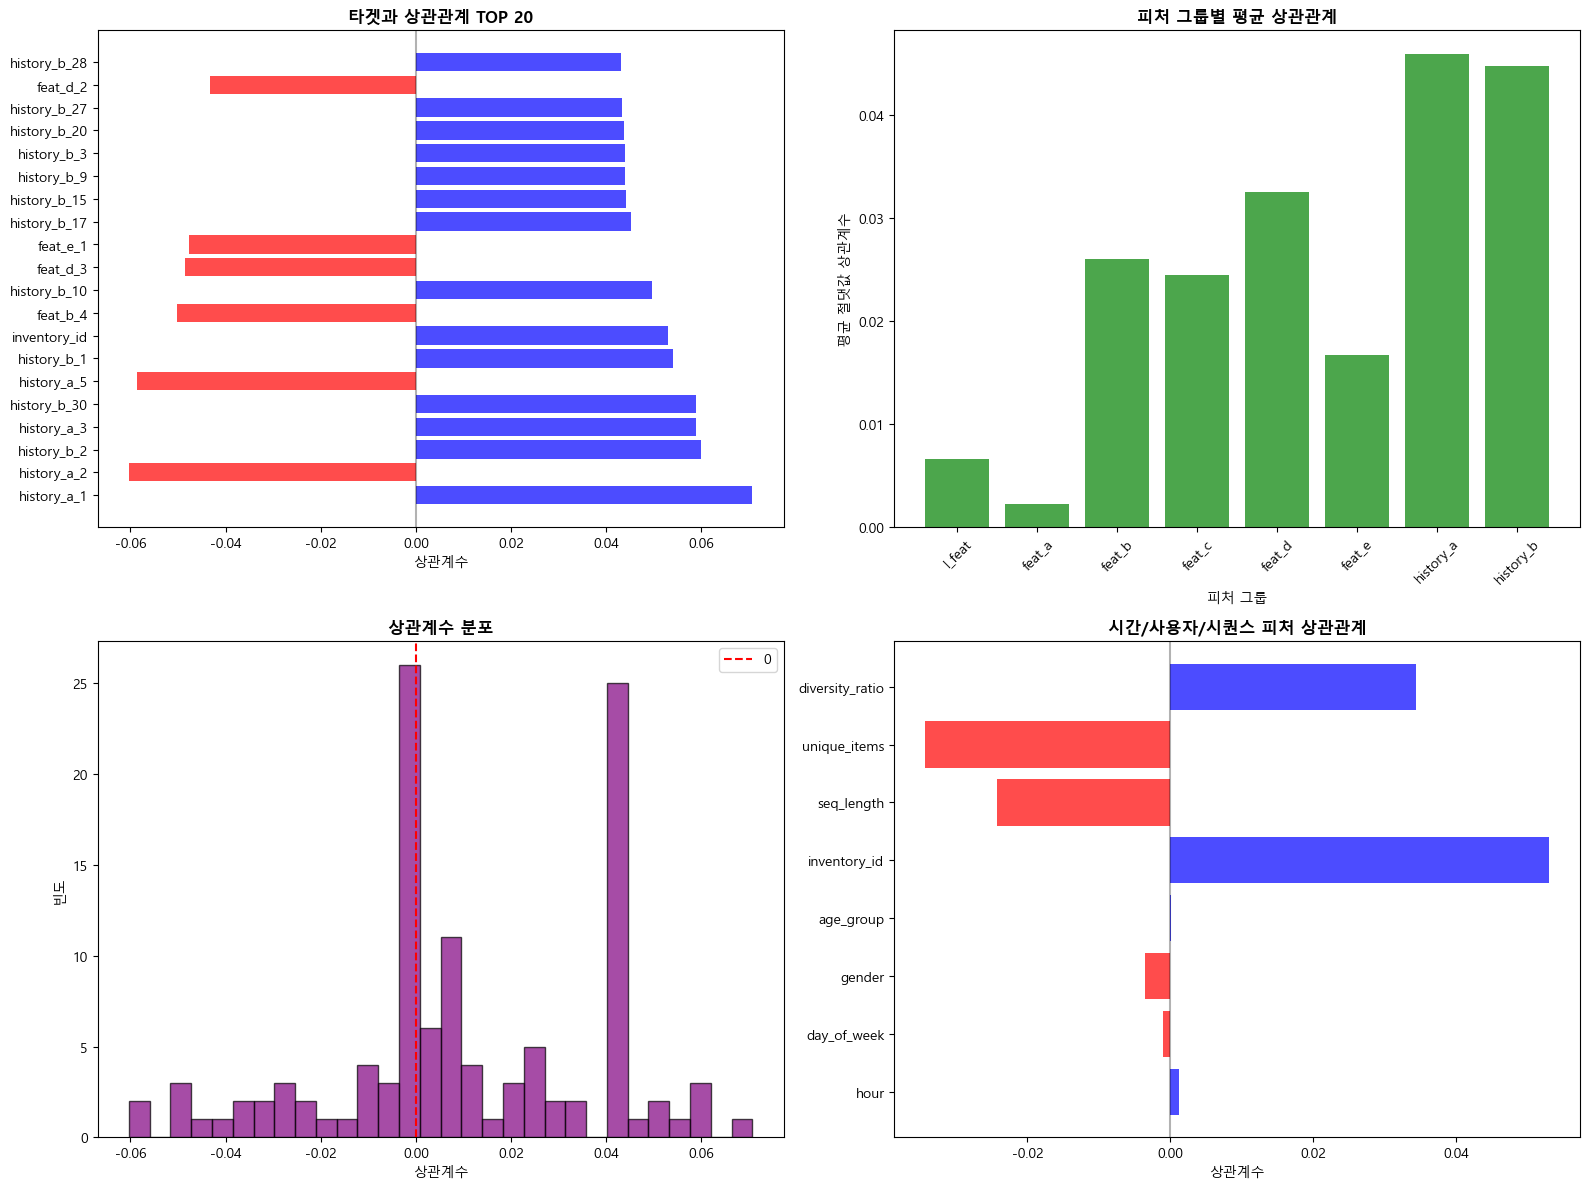

In [4]:

# ========================================
# 🔗 3. 타겟과 피처간 상관관계 분석
# ========================================

print("\n" + "="*60)
print("🔗 타겟과 피처간 상관관계 분석")
print("="*60)

# 수치형 피처들과 타겟의 상관관계
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col != 'clicked']

# 상관관계 계산 (결측값 처리)
correlations = []
for feature in numeric_features:
    if df[feature].notna().sum() > 100:  # 충분한 데이터가 있는 경우만
        corr = df[['clicked', feature]].corr().iloc[0, 1]
        if not np.isnan(corr):
            correlations.append((feature, abs(corr), corr))

correlations.sort(key=lambda x: x[1], reverse=True)

print("📊 타겟과 상관관계 TOP 20:")
for i, (feature, abs_corr, corr) in enumerate(correlations[:20]):
    print(f"   {i+1:2d}. {feature:20s}: {corr:8.4f} (절댓값: {abs_corr:.4f})")

# 상관관계 시각화
top_features = [item[0] for item in correlations[:20]]
corr_values = [item[2] for item in correlations[:20]]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. 상위 20개 피처의 상관관계
axes[0,0].barh(range(len(top_features)), corr_values, color=['red' if x < 0 else 'blue' for x in corr_values], alpha=0.7)
axes[0,0].set_yticks(range(len(top_features)))
axes[0,0].set_yticklabels(top_features)
axes[0,0].set_title('타겟과 상관관계 TOP 20', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('상관계수')
axes[0,0].axvline(0, color='black', linestyle='-', alpha=0.3)

# 2. 피처 그룹별 평균 상관관계
group_correlations = {}
for group, features in feature_groups.items():
    group_corrs = []
    for feature in features:
        if feature in [item[0] for item in correlations]:
            corr_val = next(item[2] for item in correlations if item[0] == feature)
            group_corrs.append(abs(corr_val))
    if group_corrs:
        group_correlations[group] = np.mean(group_corrs)

if group_correlations:
    groups = list(group_correlations.keys())
    values = list(group_correlations.values())
    axes[0,1].bar(groups, values, color='green', alpha=0.7)
    axes[0,1].set_title('피처 그룹별 평균 상관관계', fontsize=12, fontweight='bold')
    axes[0,1].set_xlabel('피처 그룹')
    axes[0,1].set_ylabel('평균 절댓값 상관계수')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. 상관관계 분포
all_corr_values = [item[2] for item in correlations]
axes[1,0].hist(all_corr_values, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1,0].set_title('상관계수 분포', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('상관계수')
axes[1,0].set_ylabel('빈도')
axes[1,0].axvline(0, color='red', linestyle='--', label='0')
axes[1,0].legend()

# 4. 시간/사용자 피처와의 상관관계
time_user_features = ['hour', 'day_of_week', 'gender', 'age_group', 'inventory_id', 'seq_length', 'unique_items', 'diversity_ratio']
time_user_corrs = []
time_user_names = []

for feature in time_user_features:
    if feature in df.columns:
        corr = df[['clicked', feature]].corr().iloc[0, 1]
        if not np.isnan(corr):
            time_user_corrs.append(corr)
            time_user_names.append(feature)

if time_user_corrs:
    axes[1,1].barh(range(len(time_user_names)), time_user_corrs, 
                   color=['red' if x < 0 else 'blue' for x in time_user_corrs], alpha=0.7)
    axes[1,1].set_yticks(range(len(time_user_names)))
    axes[1,1].set_yticklabels(time_user_names)
    axes[1,1].set_title('시간/사용자/시퀀스 피처 상관관계', fontsize=12, fontweight='bold')
    axes[1,1].set_xlabel('상관계수')
    axes[1,1].axvline(0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:

# ========================================
# 🔥 4. 피처 중요도 분석 (간단한 통계적 방법)
# ========================================

print("\n" + "="*60)
print("🔥 피처 중요도 분석")
print("="*60)

# 범주형 피처의 카이제곱 검정
categorical_features = ['gender', 'age_group', 'day_of_week', 'hour', 'inventory_id']
chi2_results = []

for feature in categorical_features:
    if feature in df.columns:
        # 결측값 제거
        temp_df = df[[feature, 'clicked']].dropna()
        if len(temp_df) > 0:
            contingency = pd.crosstab(temp_df[feature], temp_df['clicked'])
            if contingency.shape[0] > 1 and contingency.shape[1] > 1:
                chi2, p_value, dof, expected = chi2_contingency(contingency)
                chi2_results.append((feature, chi2, p_value))

chi2_results.sort(key=lambda x: x[1], reverse=True)

print("📊 범주형 피처 카이제곱 검정 결과:")
for feature, chi2_stat, p_val in chi2_results:
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    print(f"   {feature:15s}: χ² = {chi2_stat:10.2f}, p-value = {p_val:.6f} {significance}")

# 수치형 피처의 평균 차이 분석
print(f"\n📊 수치형 피처 클릭/비클릭 평균 차이 (TOP 15):")
feature_diffs = []

for feature in top_features[:15]:  # 상관관계 높은 피처들만
    clicked_mean = df[df['clicked'] == 1][feature].mean()
    not_clicked_mean = df[df['clicked'] == 0][feature].mean()
    diff = clicked_mean - not_clicked_mean
    feature_diffs.append((feature, clicked_mean, not_clicked_mean, diff))

feature_diffs.sort(key=lambda x: abs(x[3]), reverse=True)

for feature, click_mean, no_click_mean, diff in feature_diffs:
    print(f"   {feature:20s}: 클릭 {click_mean:8.4f} vs 비클릭 {no_click_mean:8.4f} (차이: {diff:8.4f})")



🔥 피처 중요도 분석
📊 범주형 피처 카이제곱 검정 결과:
   inventory_id   : χ² =    8744.28, p-value = 0.000000 ***
   age_group      : χ² =    1389.78, p-value = 0.000000 ***
   day_of_week    : χ² =     176.78, p-value = 0.000000 ***
   hour           : χ² =     143.95, p-value = 0.000000 ***
   gender         : χ² =      25.02, p-value = 0.000001 ***

📊 수치형 피처 클릭/비클릭 평균 차이 (TOP 15):
   inventory_id        : 클릭  40.1495 vs 비클릭  31.4623 (차이:   8.6872)
   feat_e_1            : 클릭  57.7208 vs 비클릭  61.1789 (차이:  -3.4581)
   history_b_2         : 클릭   1.4913 vs 비클릭   0.5867 (차이:   0.9046)
   history_b_1         : 클릭   0.9465 vs 비클릭   0.4187 (차이:   0.5278)
   history_b_30        : 클릭   0.5383 vs 비클릭   0.2112 (차이:   0.3270)
   history_b_10        : 클릭   0.3683 vs 비클릭   0.1490 (차이:   0.2193)
   feat_d_3            : 클릭   1.2786 vs 비클릭   1.4781 (차이:  -0.1995)
   history_a_1         : 클릭   0.3069 vs 비클릭   0.1100 (차이:   0.1969)
   history_b_17        : 클릭   0.2566 vs 비클릭   0.1036 (차이:   0.1530)
   history_a_2       

🚀 Part 3: 고급 분석 - PCA/클러스터링 + 심화 인사이트
📊 로드된 데이터: 2,000,000 샘플

🔍 피처 상호작용 심화 분석
📊 inventory_id x 시간대 상호작용:
최고 성과 조합 (inventory_id x hour):
                    샘플수  클릭수     클릭률
inventory_id hour                   
31           3      645   32  0.0496
88           4     1399   64  0.0457
             15    5913  268  0.0453
             14    6322  274  0.0433
             13    6659  285  0.0428
             20    6816  281  0.0412
             10    6690  274  0.0410
             8     6052  247  0.0408
             11    6490  264  0.0407
             3     1402   57  0.0407

📊 연령그룹 x 다양성 비율 상호작용:
                           샘플수     클릭률
age_group diversity_bin               
1.0       높음               638  0.1082
          매우높음             545  0.0862
          보통              1888  0.0768
8.0       매우높음            4141  0.0553
          높음              4278  0.0535
1.0       낮음              2304  0.0534
7.0       매우높음            8849  0.0445
6.0       매우높음            8862  0.0367
7.0  

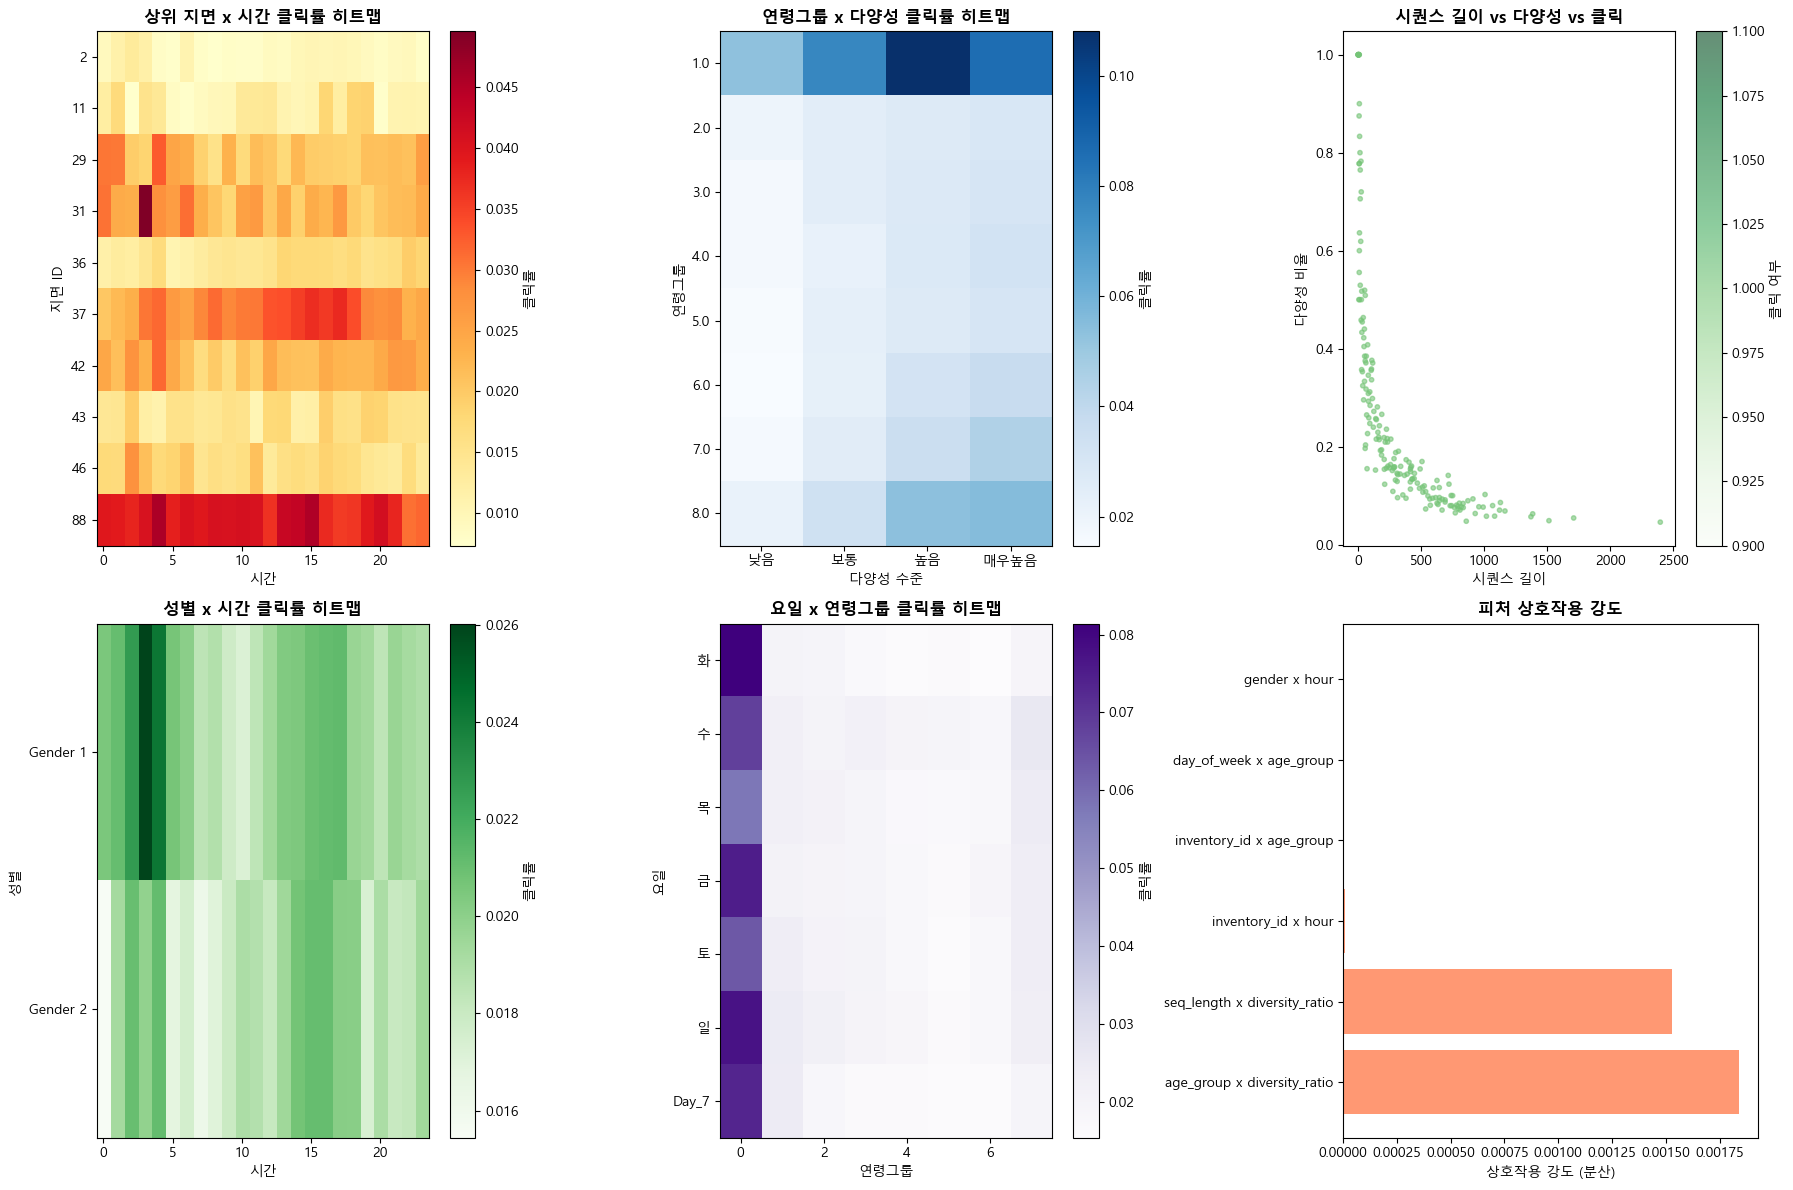

In [2]:
# 광고 클릭 예측 데이터 분석 - Part 3
# 고급 분석: PCA/클러스터링 + 심화 인사이트 + 인터랙티브 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# # 한글 폰트 설정
# plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Malgun Gothic']
# plt.rcParams['axes.unicode_minus'] = False
# plt.style.use('default')
# sns.set_palette("husl")

print("🚀 Part 3: 고급 분석 - PCA/클러스터링 + 심화 인사이트")
print("=" * 70)

# 데이터 로드
df = pd.read_csv('train_sample_2000000.csv')

# 시퀀스 분석 결과 재생성 (Part 2에서 생성한 피처들)
df['seq_length'] = df['seq'].str.split(',').str.len()
def count_unique_items(seq_str):
    try:
        items = seq_str.split(',')
        return len(set(items))
    except:
        return 0

df['unique_items'] = df['seq'].apply(count_unique_items)
df['diversity_ratio'] = df['unique_items'] / df['seq_length']

print(f"📊 로드된 데이터: {len(df):,} 샘플")

# ========================================
# 🔍 1. 피처 상호작용 심화 분석
# ========================================

print("\n" + "="*70)
print("🔍 피처 상호작용 심화 분석")
print("="*70)

# 핵심 피처들 정의 (Part 2 결과 기반)
top_features = [
    'history_a_1', 'history_a_2', 'history_b_2', 'history_a_3', 'history_b_30',
    'history_a_5', 'history_b_1', 'inventory_id', 'feat_b_4', 'history_b_10'
]

# 시간 + 사용자 + 시퀀스 피처
context_features = ['hour', 'day_of_week', 'gender', 'age_group', 'seq_length', 'diversity_ratio']

# 상호작용 분석: inventory_id x 시간대
print("📊 inventory_id x 시간대 상호작용:")
inv_hour_analysis = df.groupby(['inventory_id', 'hour']).agg({
    'clicked': ['count', 'sum', 'mean']
}).round(4)
inv_hour_analysis.columns = ['샘플수', '클릭수', '클릭률']

# 상위 inventory_id들만 분석
top_inventories = df['inventory_id'].value_counts().head(10).index
inv_hour_filtered = inv_hour_analysis.loc[top_inventories]
best_combinations = inv_hour_filtered.sort_values('클릭률', ascending=False).head(10)
print("최고 성과 조합 (inventory_id x hour):")
print(best_combinations)

# 연령그룹 x 다양성 비율 상호작용
print(f"\n📊 연령그룹 x 다양성 비율 상호작용:")
df['diversity_bin'] = pd.cut(df['diversity_ratio'], bins=4, labels=['낮음', '보통', '높음', '매우높음'])
age_diversity_analysis = df.groupby(['age_group', 'diversity_bin']).agg({
    'clicked': ['count', 'mean']
}).round(4)
age_diversity_analysis.columns = ['샘플수', '클릭률']
print(age_diversity_analysis.sort_values('클릭률', ascending=False).head(10))

# 상호작용 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. inventory_id TOP 10의 시간별 클릭률 히트맵
top_inv_hour = df[df['inventory_id'].isin(top_inventories)]
pivot_inv_hour = top_inv_hour.groupby(['inventory_id', 'hour'])['clicked'].mean().unstack(fill_value=0)
im1 = axes[0,0].imshow(pivot_inv_hour.values, cmap='YlOrRd', aspect='auto')
axes[0,0].set_title('상위 지면 x 시간 클릭률 히트맵', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('시간')
axes[0,0].set_ylabel('지면 ID')
axes[0,0].set_yticks(range(len(pivot_inv_hour.index)))
axes[0,0].set_yticklabels(pivot_inv_hour.index)
plt.colorbar(im1, ax=axes[0,0], label='클릭률')

# 2. 연령그룹 x 다양성 히트맵
pivot_age_div = df.groupby(['age_group', 'diversity_bin'])['clicked'].mean().unstack(fill_value=0)
im2 = axes[0,1].imshow(pivot_age_div.values, cmap='Blues', aspect='auto')
axes[0,1].set_title('연령그룹 x 다양성 클릭률 히트맵', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('다양성 수준')
axes[0,1].set_ylabel('연령그룹')
axes[0,1].set_yticks(range(len(pivot_age_div.index)))
axes[0,1].set_yticklabels(pivot_age_div.index)
axes[0,1].set_xticks(range(len(pivot_age_div.columns)))
axes[0,1].set_xticklabels(pivot_age_div.columns)
plt.colorbar(im2, ax=axes[0,1], label='클릭률')

# 3. 시퀀스 길이 vs 다양성 vs 클릭률 (3D 스타일)
sample_df = df.sample(n=10000)  # 샘플링
sample_df = sample_df[sample_df['clicked'] == 1]
scatter = axes[0,2].scatter(sample_df['seq_length'], sample_df['diversity_ratio'], 
                           c=sample_df['clicked'], cmap='Greens', alpha=0.6, s=10)
axes[0,2].set_title('시퀀스 길이 vs 다양성 vs 클릭', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('시퀀스 길이')
axes[0,2].set_ylabel('다양성 비율')
plt.colorbar(scatter, ax=axes[0,2], label='클릭 여부')

# 4. 성별 x 시간 x 클릭률
pivot_gender_hour = df.groupby(['gender', 'hour'])['clicked'].mean().unstack(fill_value=0)
im3 = axes[1,0].imshow(pivot_gender_hour.values, cmap='Greens', aspect='auto')
axes[1,0].set_title('성별 x 시간 클릭률 히트맵', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('시간')
axes[1,0].set_ylabel('성별')
axes[1,0].set_yticks(range(len(pivot_gender_hour.index)))
axes[1,0].set_yticklabels([f'Gender {int(x)}' for x in pivot_gender_hour.index])
plt.colorbar(im3, ax=axes[1,0], label='클릭률')

# 5. 요일 x 연령그룹 패턴
pivot_day_age = df.groupby(['day_of_week', 'age_group'])['clicked'].mean().unstack(fill_value=0)
im4 = axes[1,1].imshow(pivot_day_age.values, cmap='Purples', aspect='auto')
axes[1,1].set_title('요일 x 연령그룹 클릭률 히트맵', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('연령그룹')
axes[1,1].set_ylabel('요일')
day_names = ['월', '화', '수', '목', '금', '토', '일']
axes[1,1].set_yticks(range(len(pivot_day_age.index)))
axes[1,1].set_yticklabels([day_names[i] if i < len(day_names) else f'Day_{i}' for i in pivot_day_age.index])
plt.colorbar(im4, ax=axes[1,1], label='클릭률')

# 6. 종합 상호작용 강도 분석
interaction_strength = []
feature_pairs = [
    ('inventory_id', 'hour'), ('age_group', 'diversity_ratio'), 
    ('gender', 'hour'), ('day_of_week', 'age_group'),
    ('inventory_id', 'age_group'), ('seq_length', 'diversity_ratio')
]

for feat1, feat2 in feature_pairs:
    if feat1 in df.columns and feat2 in df.columns:
        cross_tab = pd.crosstab(df[feat1], df[feat2], df['clicked'], aggfunc='mean')
        variance = cross_tab.var().var() if not cross_tab.empty else 0
        interaction_strength.append((f'{feat1} x {feat2}', variance))

interaction_strength.sort(key=lambda x: x[1], reverse=True)
features_names = [item[0] for item in interaction_strength]
strengths = [item[1] for item in interaction_strength]

axes[1,2].barh(range(len(features_names)), strengths, color='coral', alpha=0.8)
axes[1,2].set_yticks(range(len(features_names)))
axes[1,2].set_yticklabels(features_names)
axes[1,2].set_title('피처 상호작용 강도', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('상호작용 강도 (분산)')

plt.tight_layout()
plt.show()



🎯 PCA 차원축소 및 패턴 발견
📊 PCA 분석 결과:
   95% 분산 설명하는 성분 수: 60
   90% 분산 설명하는 성분 수: 48
   처음 10개 성분의 분산 설명율: 0.6023

🔍 PC1 (제1주성분) 주요 기여 피처 TOP 10:
          feature  importance
107  history_b_21    0.165217
104  history_b_18    0.165216
102  history_b_16    0.165216
109  history_b_23    0.165215
111  history_b_25    0.165215
115  history_b_29    0.165214
110  history_b_24    0.165213
92    history_b_6    0.165213
97   history_b_11    0.165212
108  history_b_22    0.165210

🔍 PC2 (제2주성분) 주요 기여 피처 TOP 10:
          feature  importance
60       feat_b_5    0.217926
118  unique_items    0.209113
117    seq_length    0.207913
83    history_a_4    0.206077
85    history_a_6    0.203687
39       feat_e_8    0.201816
86    history_a_7    0.201534
33       feat_e_2    0.190985
58       feat_b_3    0.186632
46       feat_d_5    0.180041


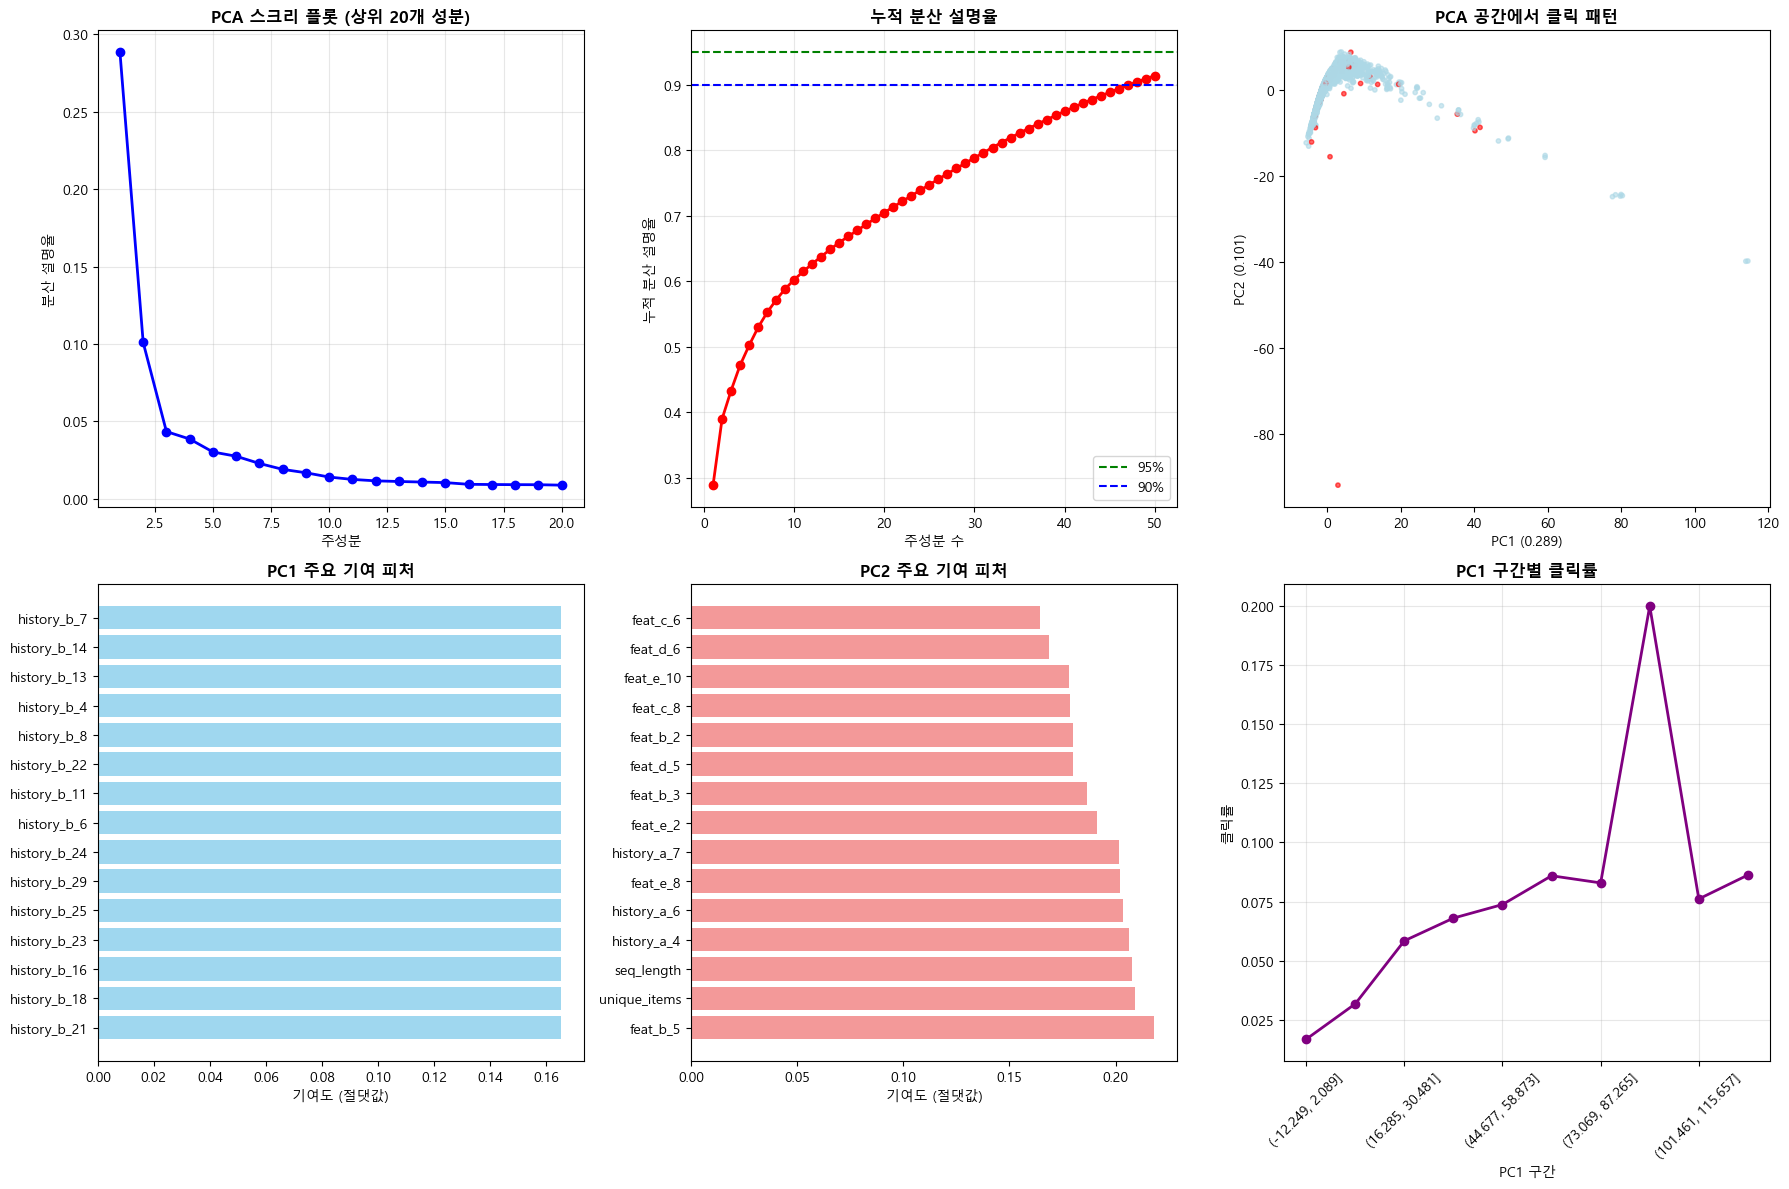

In [3]:

# ========================================
# 🎯 2. PCA 차원축소 및 패턴 발견
# ========================================

print("\n" + "="*70)
print("🎯 PCA 차원축소 및 패턴 발견")
print("="*70)

# 수치형 피처만 선택하고 결측값 처리
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['clicked']]

# PCA를 위한 데이터 준비
pca_data = df[numeric_cols].fillna(df[numeric_cols].median())
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# PCA 수행
pca = PCA()
pca_result = pca.fit_transform(pca_data_scaled)

# 누적 분산 비율 계산
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_var_ratio >= 0.95) + 1
n_components_90 = np.argmax(cumsum_var_ratio >= 0.90) + 1

print(f"📊 PCA 분석 결과:")
print(f"   95% 분산 설명하는 성분 수: {n_components_95}")
print(f"   90% 분산 설명하는 성분 수: {n_components_90}")
print(f"   처음 10개 성분의 분산 설명율: {cumsum_var_ratio[9]:.4f}")

# 주성분별 피처 기여도 분석
feature_importance_pc1 = pd.DataFrame({
    'feature': numeric_cols,
    'importance': np.abs(pca.components_[0])
}).sort_values('importance', ascending=False)

feature_importance_pc2 = pd.DataFrame({
    'feature': numeric_cols,
    'importance': np.abs(pca.components_[1])
}).sort_values('importance', ascending=False)

print(f"\n🔍 PC1 (제1주성분) 주요 기여 피처 TOP 10:")
print(feature_importance_pc1.head(10))

print(f"\n🔍 PC2 (제2주성분) 주요 기여 피처 TOP 10:")
print(feature_importance_pc2.head(10))

# PCA 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 분산 설명율 스크리 플롯
axes[0,0].plot(range(1, 21), pca.explained_variance_ratio_[:20], 'bo-', linewidth=2)
axes[0,0].set_title('PCA 스크리 플롯 (상위 20개 성분)', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('주성분')
axes[0,0].set_ylabel('분산 설명율')
axes[0,0].grid(True, alpha=0.3)

# 2. 누적 분산 설명율
axes[0,1].plot(range(1, 51), cumsum_var_ratio[:50], 'ro-', linewidth=2)
axes[0,1].axhline(y=0.95, color='green', linestyle='--', label='95%')
axes[0,1].axhline(y=0.90, color='blue', linestyle='--', label='90%')
axes[0,1].set_title('누적 분산 설명율', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('주성분 수')
axes[0,1].set_ylabel('누적 분산 설명율')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. PC1 vs PC2 산점도 (클릭별 색상)
sample_indices = np.random.choice(len(pca_result), size=5000, replace=False)
clicked_colors = df.iloc[sample_indices]['clicked'].map({0: 'lightblue', 1: 'red'})
axes[0,2].scatter(pca_result[sample_indices, 0], pca_result[sample_indices, 1], 
                  c=clicked_colors, alpha=0.6, s=10)
axes[0,2].set_title('PCA 공간에서 클릭 패턴', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f})')
axes[0,2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f})')

# 4. PC1 기여도 상위 피처들
top_pc1_features = feature_importance_pc1.head(15)
axes[1,0].barh(range(len(top_pc1_features)), top_pc1_features['importance'], color='skyblue', alpha=0.8)
axes[1,0].set_yticks(range(len(top_pc1_features)))
axes[1,0].set_yticklabels(top_pc1_features['feature'])
axes[1,0].set_title('PC1 주요 기여 피처', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('기여도 (절댓값)')

# 5. PC2 기여도 상위 피처들
top_pc2_features = feature_importance_pc2.head(15)
axes[1,1].barh(range(len(top_pc2_features)), top_pc2_features['importance'], color='lightcoral', alpha=0.8)
axes[1,1].set_yticks(range(len(top_pc2_features)))
axes[1,1].set_yticklabels(top_pc2_features['feature'])
axes[1,1].set_title('PC2 주요 기여 피처', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('기여도 (절댓값)')

# 6. 주성분별 클릭률 분석
pc1_bins = pd.cut(pca_result[:, 0], bins=10)
pc1_click_rate = df.groupby(pc1_bins)['clicked'].mean()
pc1_click_rate.plot(kind='line', ax=axes[1,2], marker='o', color='purple', linewidth=2)
axes[1,2].set_title('PC1 구간별 클릭률', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('PC1 구간')
axes[1,2].set_ylabel('클릭률')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



🎨 클러스터링을 통한 사용자 세그먼트 발굴
Cluster Features :  ['gender', 'age_group', 'inventory_id', 'day_of_week', 'hour', 'l_feat_1', 'l_feat_2', 'l_feat_3', 'l_feat_4', 'l_feat_5', 'l_feat_6', 'l_feat_7', 'l_feat_8', 'l_feat_9', 'l_feat_10', 'l_feat_11', 'l_feat_12', 'l_feat_13', 'l_feat_14', 'l_feat_15', 'l_feat_16', 'l_feat_17', 'l_feat_18', 'l_feat_19', 'l_feat_20', 'l_feat_21', 'l_feat_22', 'l_feat_23', 'l_feat_24', 'l_feat_25', 'l_feat_26', 'l_feat_27', 'feat_e_1', 'feat_e_2', 'feat_e_3', 'feat_e_4', 'feat_e_5', 'feat_e_6', 'feat_e_7', 'feat_e_8', 'feat_e_9', 'feat_e_10', 'feat_d_1', 'feat_d_2', 'feat_d_3', 'feat_d_4', 'feat_d_5', 'feat_d_6', 'feat_c_1', 'feat_c_2', 'feat_c_3', 'feat_c_4', 'feat_c_5', 'feat_c_6', 'feat_c_7', 'feat_c_8', 'feat_b_1', 'feat_b_2', 'feat_b_3', 'feat_b_4', 'feat_b_5', 'feat_b_6', 'feat_a_1', 'feat_a_2', 'feat_a_3', 'feat_a_4', 'feat_a_5', 'feat_a_6', 'feat_a_7', 'feat_a_8', 'feat_a_9', 'feat_a_10', 'feat_a_11', 'feat_a_12', 'feat_a_13', 'feat_a_14', 'feat_a_15', 'fe

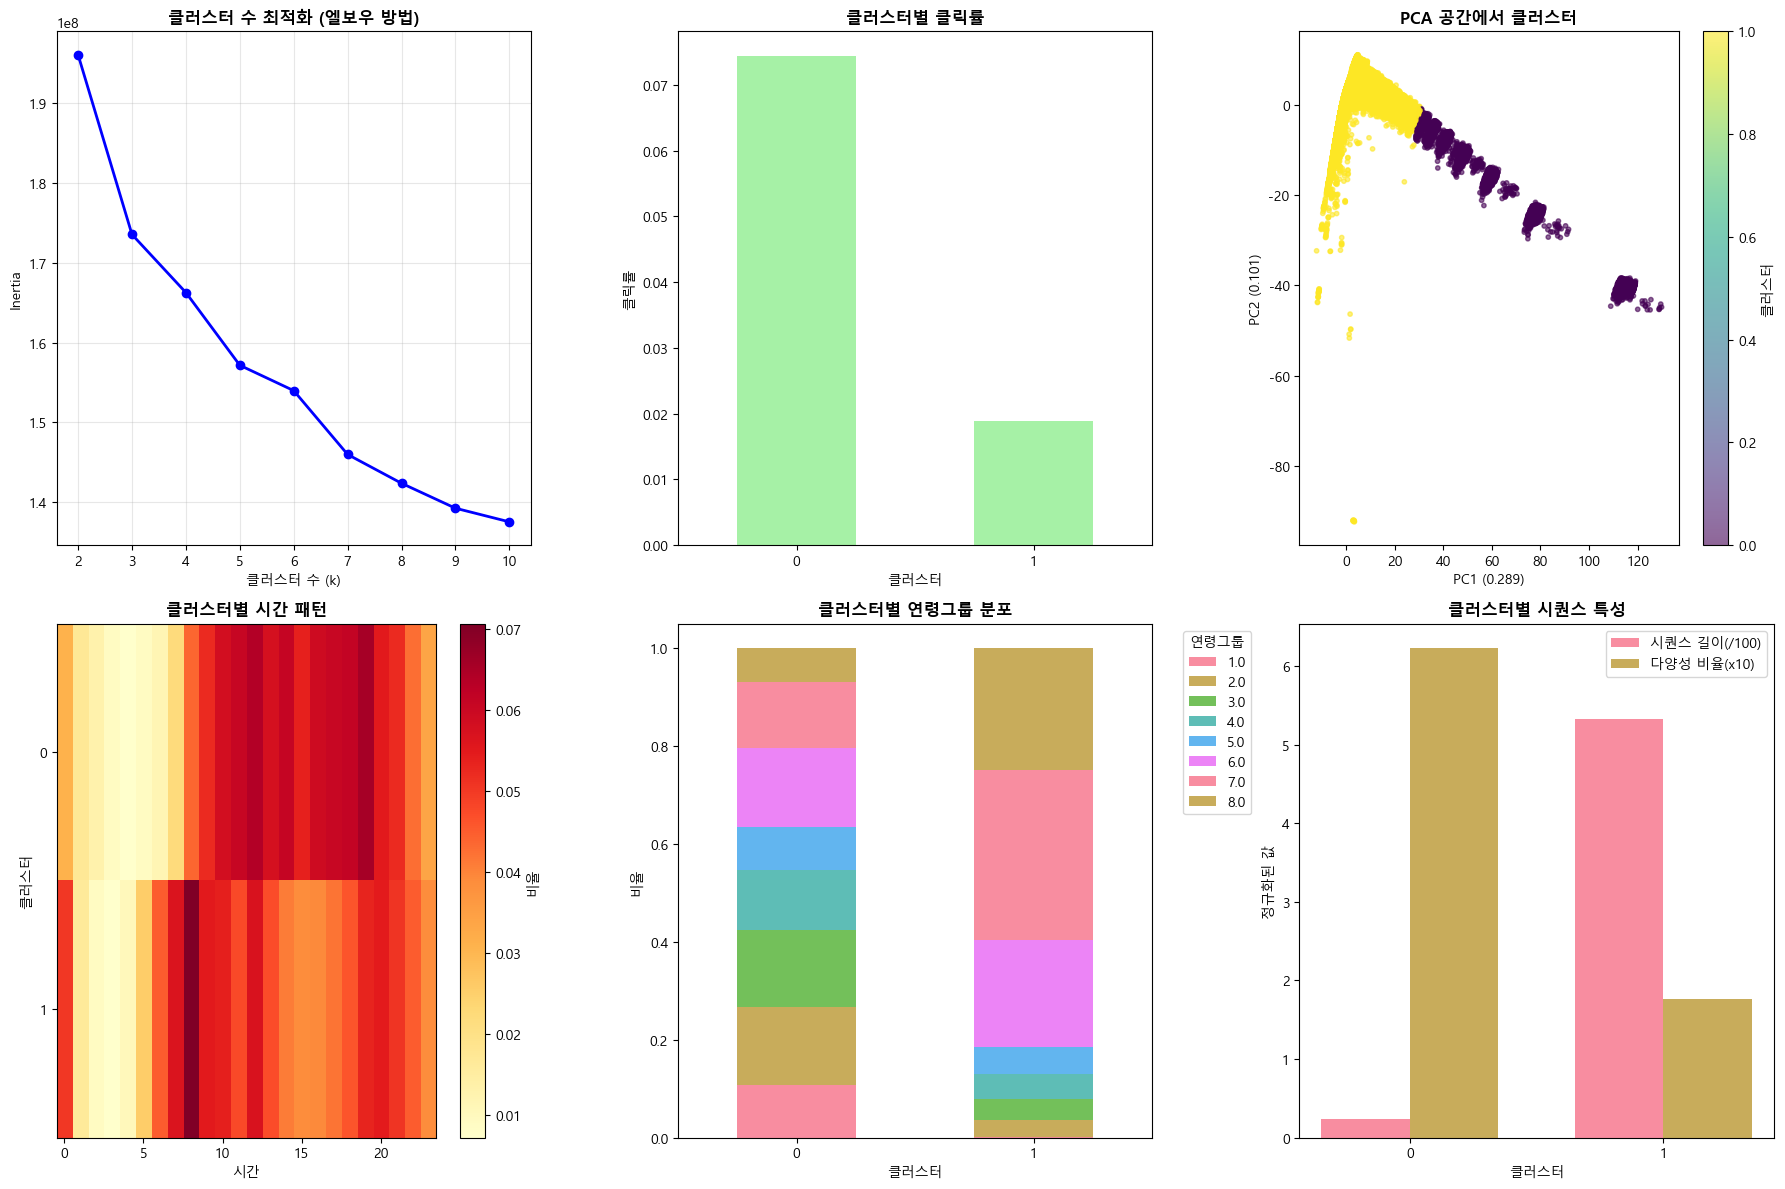

In [4]:

# ========================================
# 🎨 3. 클러스터링을 통한 사용자 세그먼트 발굴
# ========================================

print("\n" + "="*70)
print("🎨 클러스터링을 통한 사용자 세그먼트 발굴")
print("="*70)

# # 클러스터링을 위한 핵심 피처 선택
# clustering_features = ['hour', 'day_of_week', 'gender', 'age_group', 'seq_length', 'diversity_ratio', 'inventory_id']
# clustering_data = df[clustering_features].fillna(df[clustering_features].median())
# 수치형 피처만 선택하고 결측값 처리
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['clicked', 'cluster']]
pca_data = df[numeric_cols].fillna(df[numeric_cols].median())

print("Cluster Features : ", numeric_cols)

# 스케일링
scaler_cluster = StandardScaler()
clustering_data_scaled = scaler_cluster.fit_transform(pca_data)

# 최적 클러스터 수 찾기 (엘보우 방법)
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertias.append(kmeans.inertia_)

# 클러스터링 수행 (k=5로 설정)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# 클러스터별 특성 분석
cluster_analysis = df.groupby('cluster').agg({
    'clicked': ['count', 'sum', 'mean'],
    'hour': 'mean',
    'day_of_week': 'mean',
    'gender': 'mean',
    'age_group': 'mean',
    'seq_length': 'mean',
    'diversity_ratio': 'mean',
    'inventory_id': 'mean'
}).round(3)

print(f"📊 클러스터별 특성 분석:")
print(cluster_analysis)

# 클러스터별 클릭률 분석
cluster_click_rates = df.groupby('cluster')['clicked'].mean().sort_values(ascending=False)
print(f"\n🎯 클러스터별 클릭률 랭킹:")
for i, (cluster, rate) in enumerate(cluster_click_rates.items()):
    print(f"   {i+1}. 클러스터 {cluster}: {rate:.4f} ({rate*100:.2f}%)")

# 클러스터링 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. 엘보우 방법
axes[0,0].plot(K_range, inertias, 'bo-', linewidth=2)
axes[0,0].set_title('클러스터 수 최적화 (엘보우 방법)', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('클러스터 수 (k)')
axes[0,0].set_ylabel('Inertia')
axes[0,0].grid(True, alpha=0.3)

# 2. 클러스터별 클릭률
cluster_click_rates.plot(kind='bar', ax=axes[0,1], color='lightgreen', alpha=0.8)
axes[0,1].set_title('클러스터별 클릭률', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('클러스터')
axes[0,1].set_ylabel('클릭률')
axes[0,1].tick_params(axis='x', rotation=0)

# 3. PCA 공간에서 클러스터 시각화
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(clustering_data_scaled)
scatter = axes[0,2].scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], 
                           c=df['cluster'], cmap='viridis', alpha=0.6, s=10)
axes[0,2].set_title('PCA 공간에서 클러스터', fontsize=12, fontweight='bold')
axes[0,2].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
axes[0,2].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
plt.colorbar(scatter, ax=axes[0,2], label='클러스터')

# 4. 클러스터별 시간 패턴
cluster_hour = df.groupby(['cluster', 'hour']).size().unstack(fill_value=0)
cluster_hour_norm = cluster_hour.div(cluster_hour.sum(axis=1), axis=0)
im5 = axes[1,0].imshow(cluster_hour_norm.values, cmap='YlOrRd', aspect='auto')
axes[1,0].set_title('클러스터별 시간 패턴', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('시간')
axes[1,0].set_ylabel('클러스터')
axes[1,0].set_yticks(range(len(cluster_hour_norm.index)))
axes[1,0].set_yticklabels(cluster_hour_norm.index)
plt.colorbar(im5, ax=axes[1,0], label='비율')

# 5. 클러스터별 연령그룹 분포
cluster_age = pd.crosstab(df['cluster'], df['age_group'], normalize='index')
cluster_age.plot(kind='bar', ax=axes[1,1], stacked=True, alpha=0.8)
axes[1,1].set_title('클러스터별 연령그룹 분포', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('클러스터')
axes[1,1].set_ylabel('비율')
axes[1,1].tick_params(axis='x', rotation=0)
axes[1,1].legend(title='연령그룹', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. 클러스터별 시퀀스 특성
cluster_seq_stats = df.groupby('cluster')[['seq_length', 'diversity_ratio']].mean()
x = np.arange(len(cluster_seq_stats.index))
width = 0.35

axes[1,2].bar(x - width/2, cluster_seq_stats['seq_length']/100, width, label='시퀀스 길이(/100)', alpha=0.8)
axes[1,2].bar(x + width/2, cluster_seq_stats['diversity_ratio']*10, width, label='다양성 비율(x10)', alpha=0.8)
axes[1,2].set_title('클러스터별 시퀀스 특성', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('클러스터')
axes[1,2].set_ylabel('정규화된 값')
axes[1,2].set_xticks(x)
axes[1,2].set_xticklabels(cluster_seq_stats.index)
axes[1,2].legend()

plt.tight_layout()
plt.show()
